## Get Preprocessed Data

In [1]:
# import plot function
import polars as pl
import pandas as pd
from xpectrass_v002 import FTIRdataanalysis

In [2]:
df = pd.read_csv('processed_data/combined_deriv1_data.csv.xz', compression='xz')
print(df['study'].unique())

['jung_2018' 'kedzierski_2019' 'kedzierski_2019_u' 'frond_2021'
 'villegas_camacho_2024_c4' 'villegas_camacho_2024_c8']


In [3]:
df_ = df[df['study']!='kedzierski_2019_u']
print(df_['type'].unique())
print(df_['type'].value_counts())

['HDPE' 'LDPE' 'Mixture' 'PA' 'PET' 'PP' 'PS' 'PVC' 'U1' 'AFL' 'CA' 'CE'
 'R' 'M1' 'M2' 'PEVA' 'PMMA' 'PE' 'PEF' 'PEL' 'PPL' 'PU' 'U2' 'ABS' 'AC'
 'CO' 'EAA' 'PC' 'PLA' 'SR']
type
PP         1552
HDPE       1438
PS         1099
PET        1048
LDPE       1037
PVC        1025
PE          295
PEF         148
R            64
CA           56
M1           55
PEVA         53
PPL          48
PA           40
Mixture      39
CE           28
PEL          25
PU           20
ABS          15
CO           14
M2           11
PC            9
PLA           8
AC            6
PMMA          5
U2            5
U1            4
AFL           1
EAA           1
SR            1
Name: count, dtype: int64


In [4]:
selected_types = ['PP', 'HDPE', 'PS', 'PET', 'LDPE', 'PVC', 'PE', 'PEF']
df_sel = df_[df_['type'].isin(selected_types)]
df_norm = df_sel[df_sel['study']!='villegas_camacho_2024_c4']

In [5]:
fda = FTIRdataanalysis(
        df=df_norm,
        dataset_name='Combined dataset',
        label_column="type",
        exclude_columns=['stydy', 'sample_id', 'environmental', 'resulation'],
        random_state=42,
        n_jobs=-1,
)

Auto-detected: Absorbance


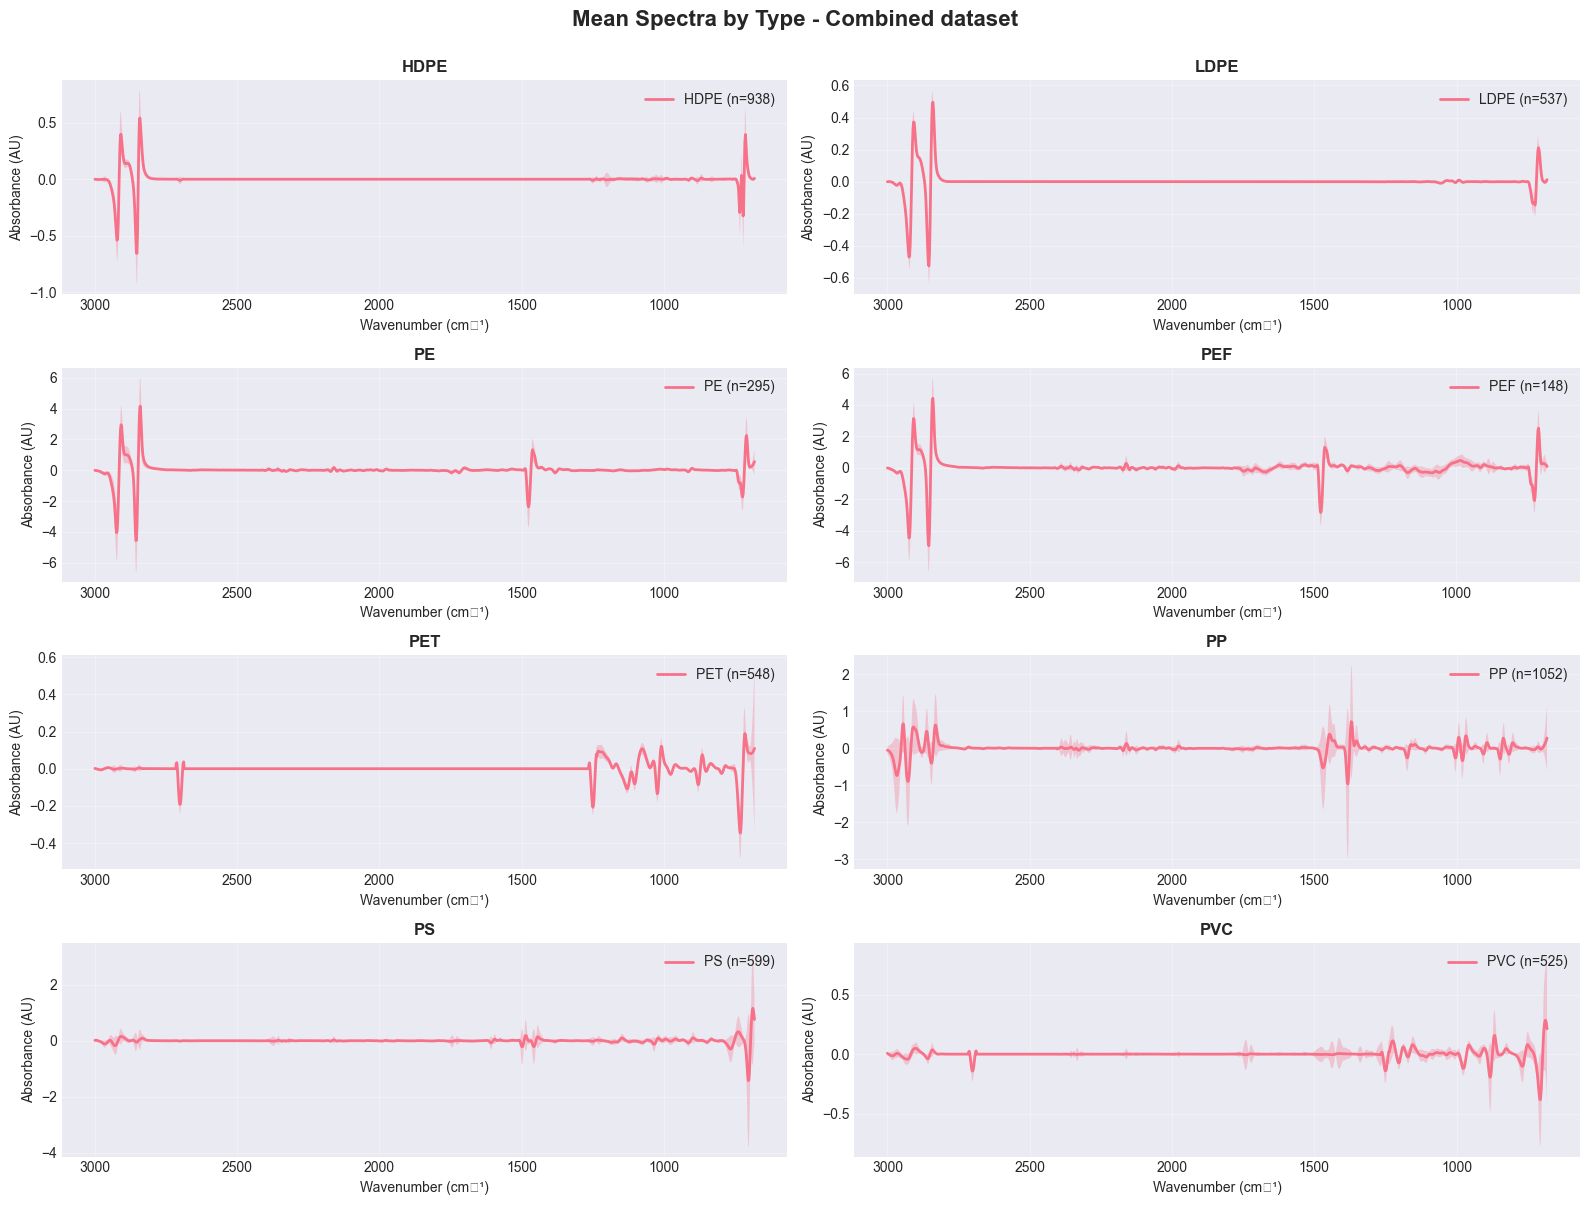

In [6]:
fda.plot_mean_spectra(
            title="Mean Spectra by Type",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
)

Auto-detected: Absorbance


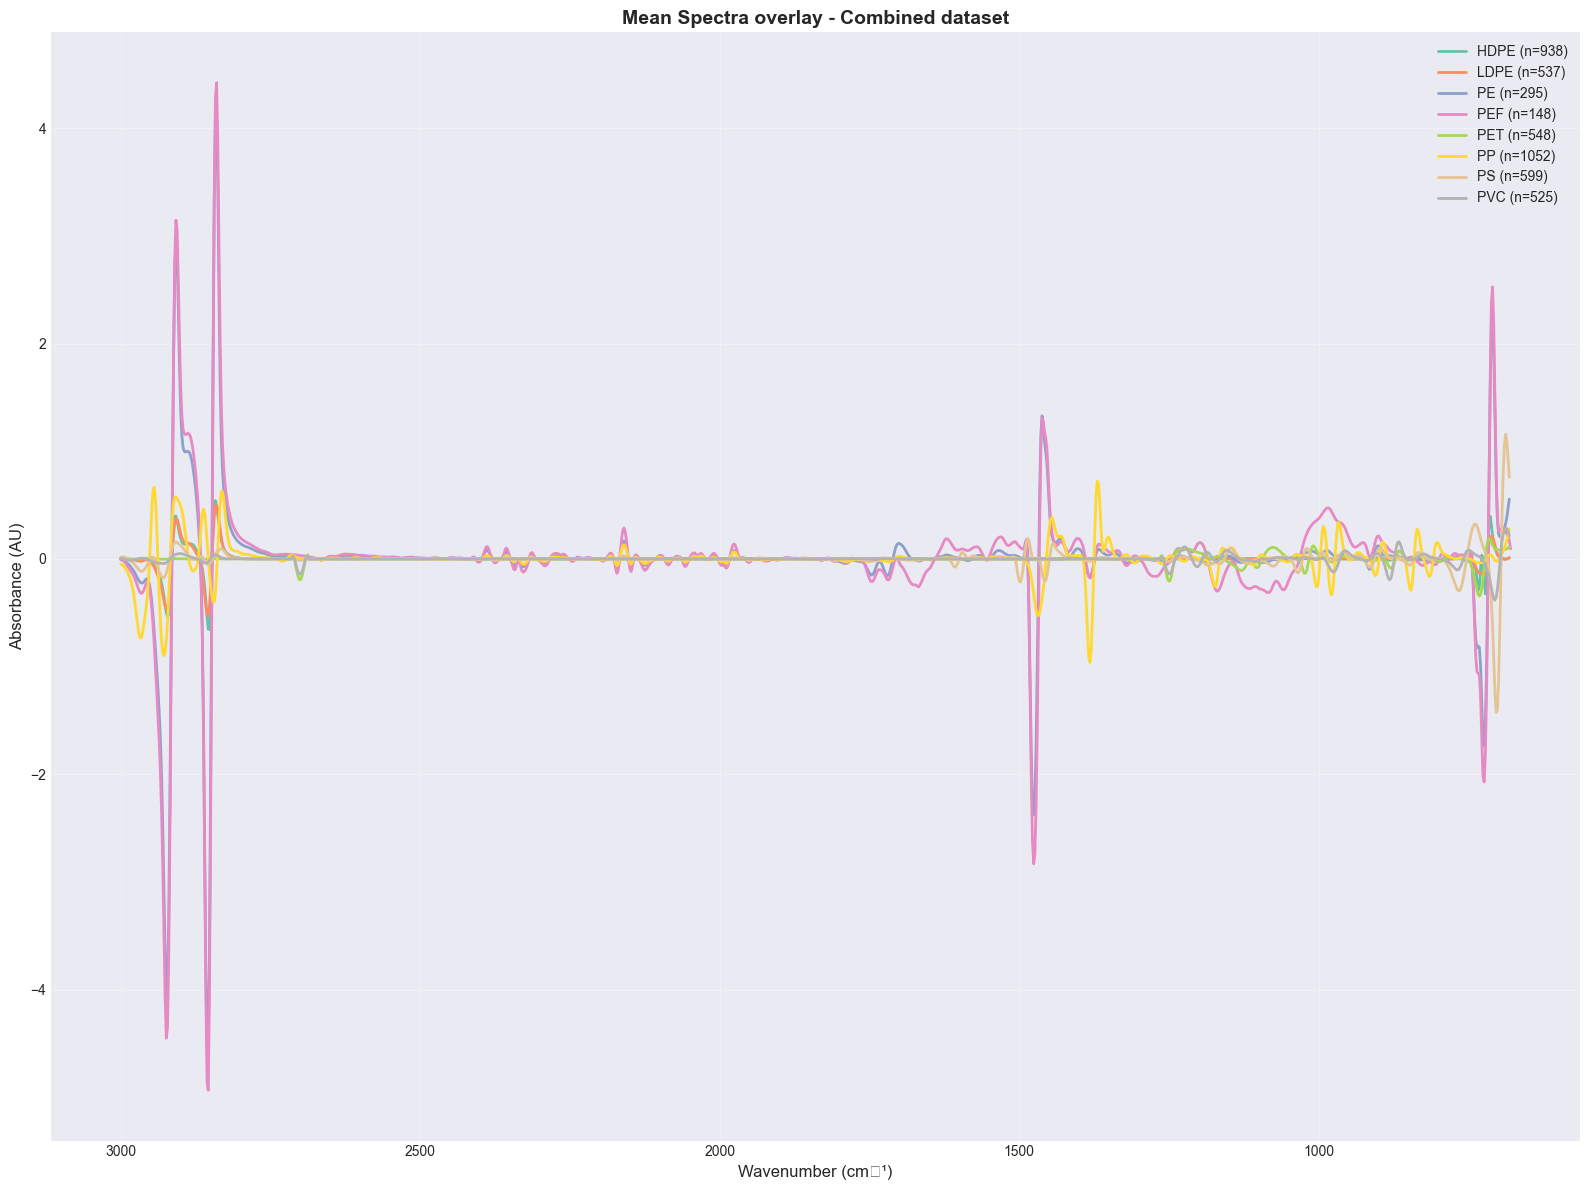

In [7]:
fda.plot_overlay_spectra(
            title="Mean Spectra overlay",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

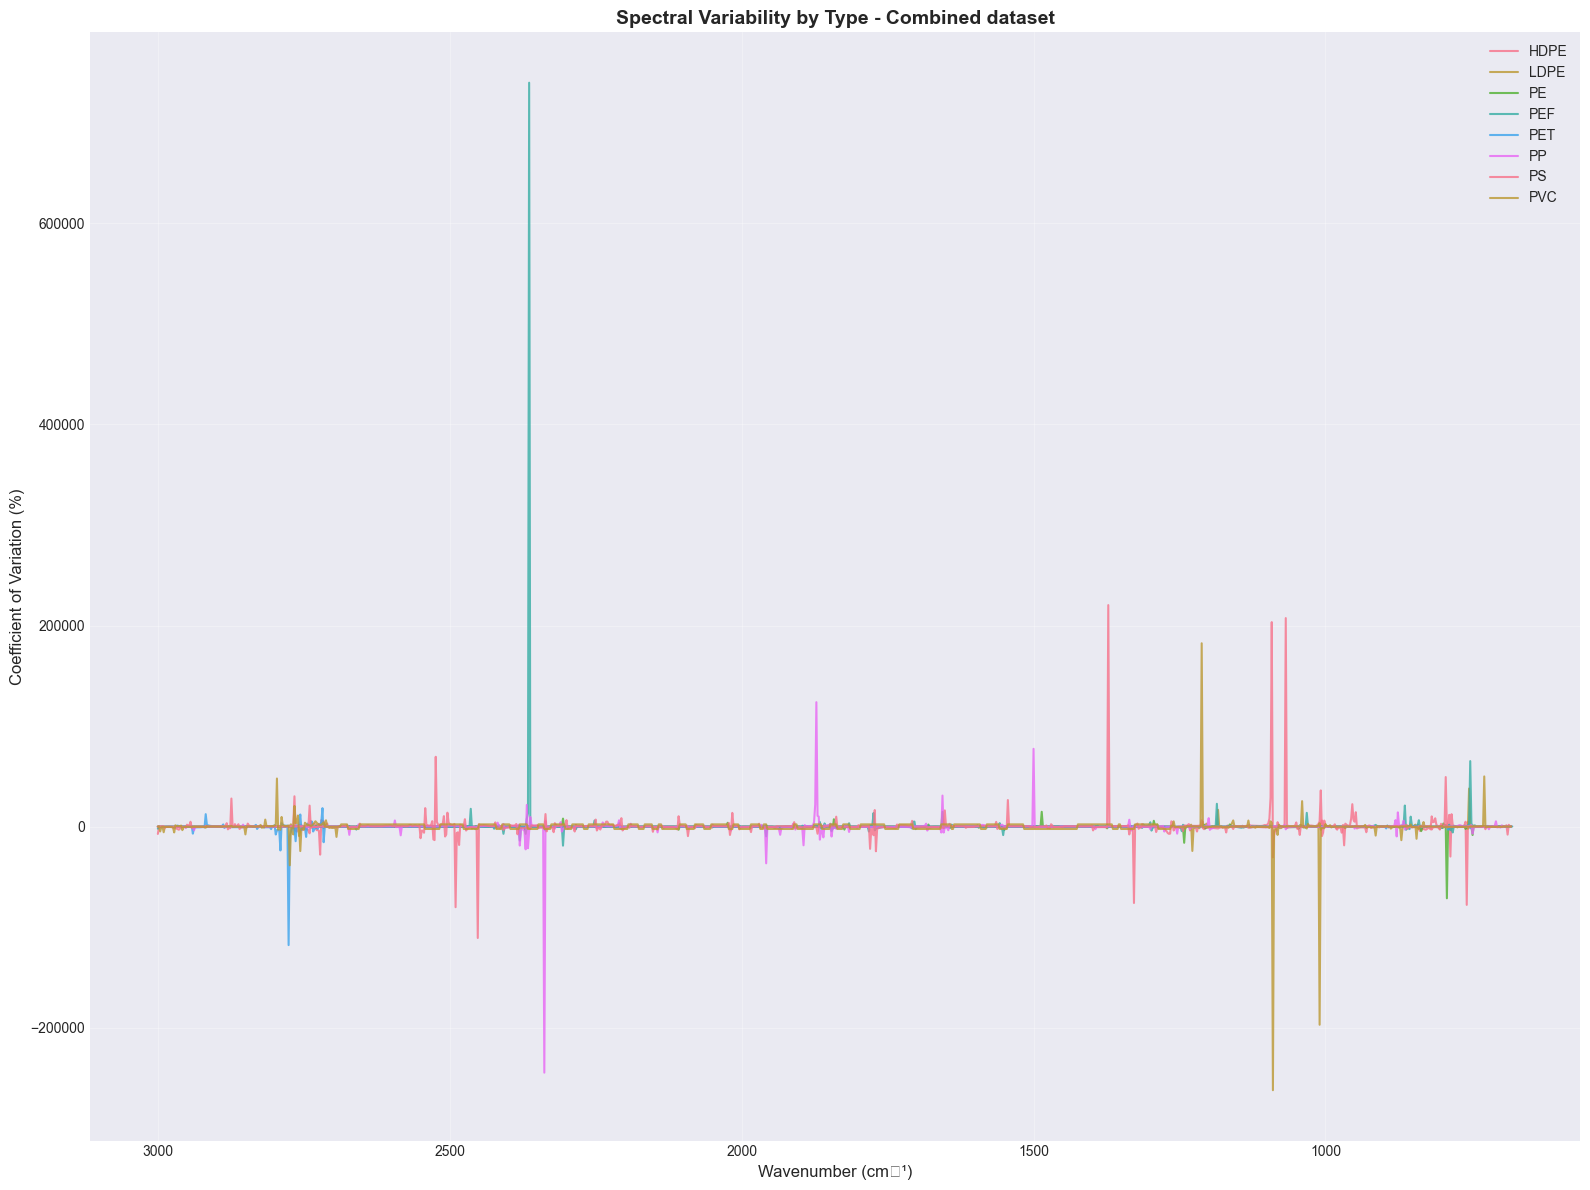

In [8]:
fda.plot_cv(
            title="Spectral Variability by Type",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

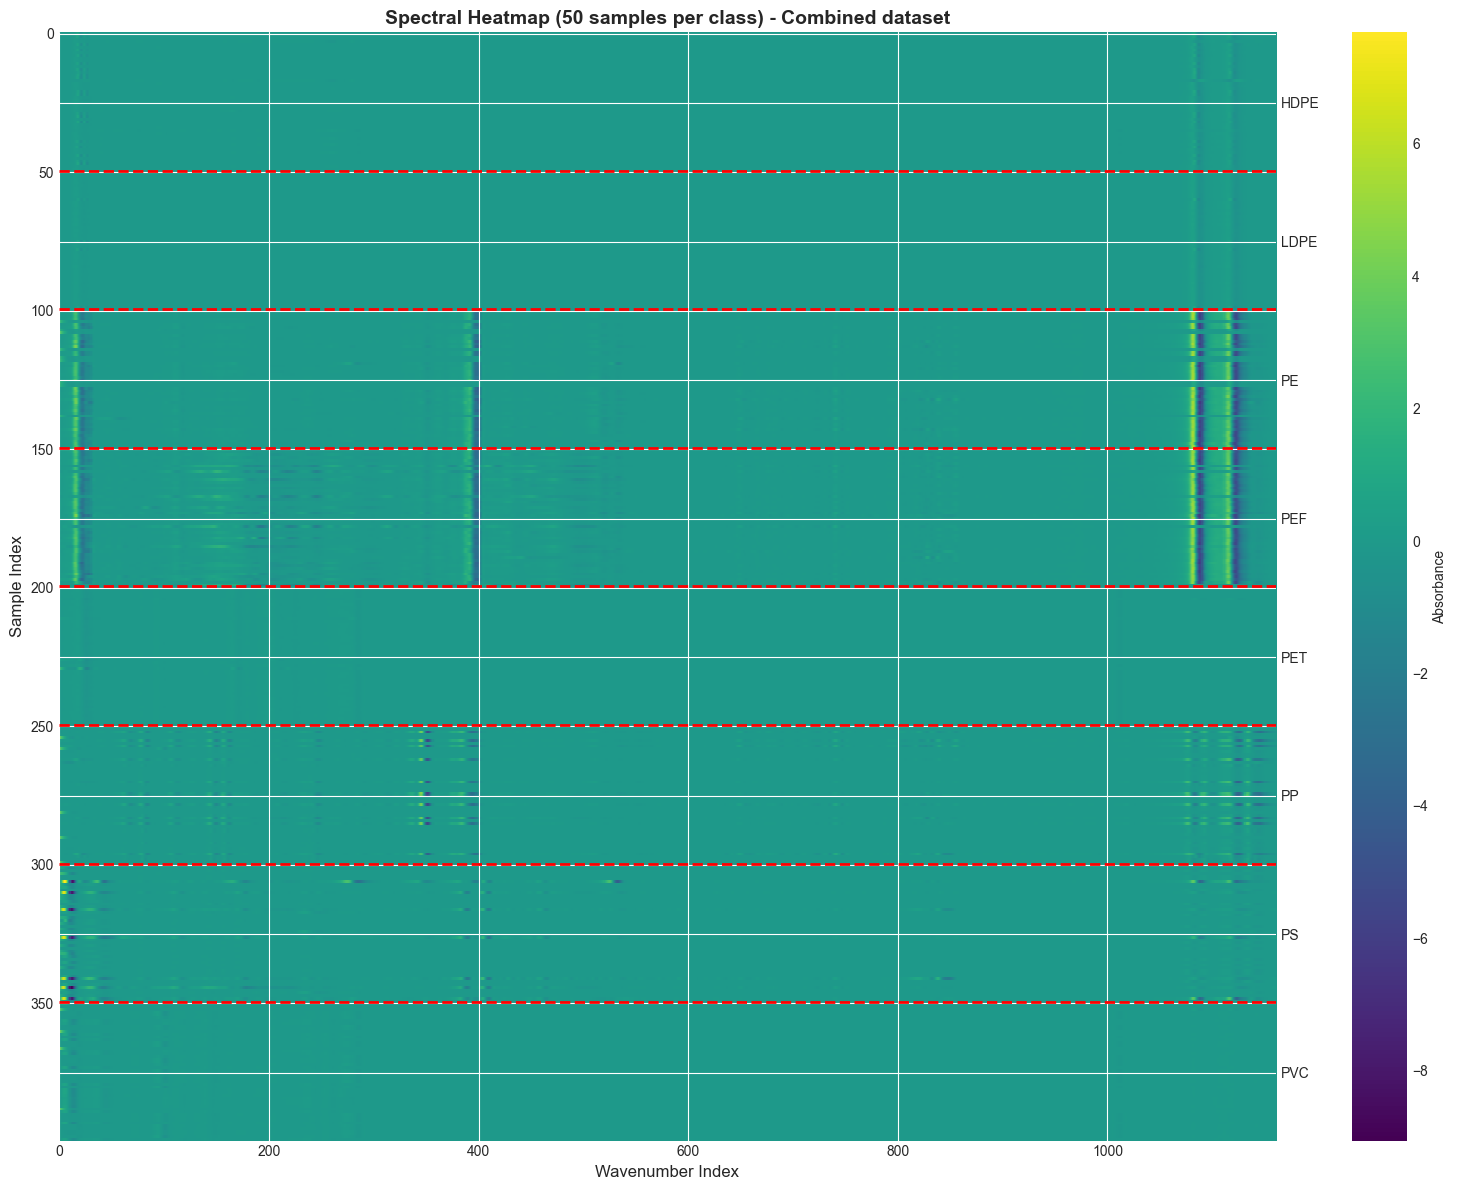

In [9]:
fda.plot_heatmap(
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

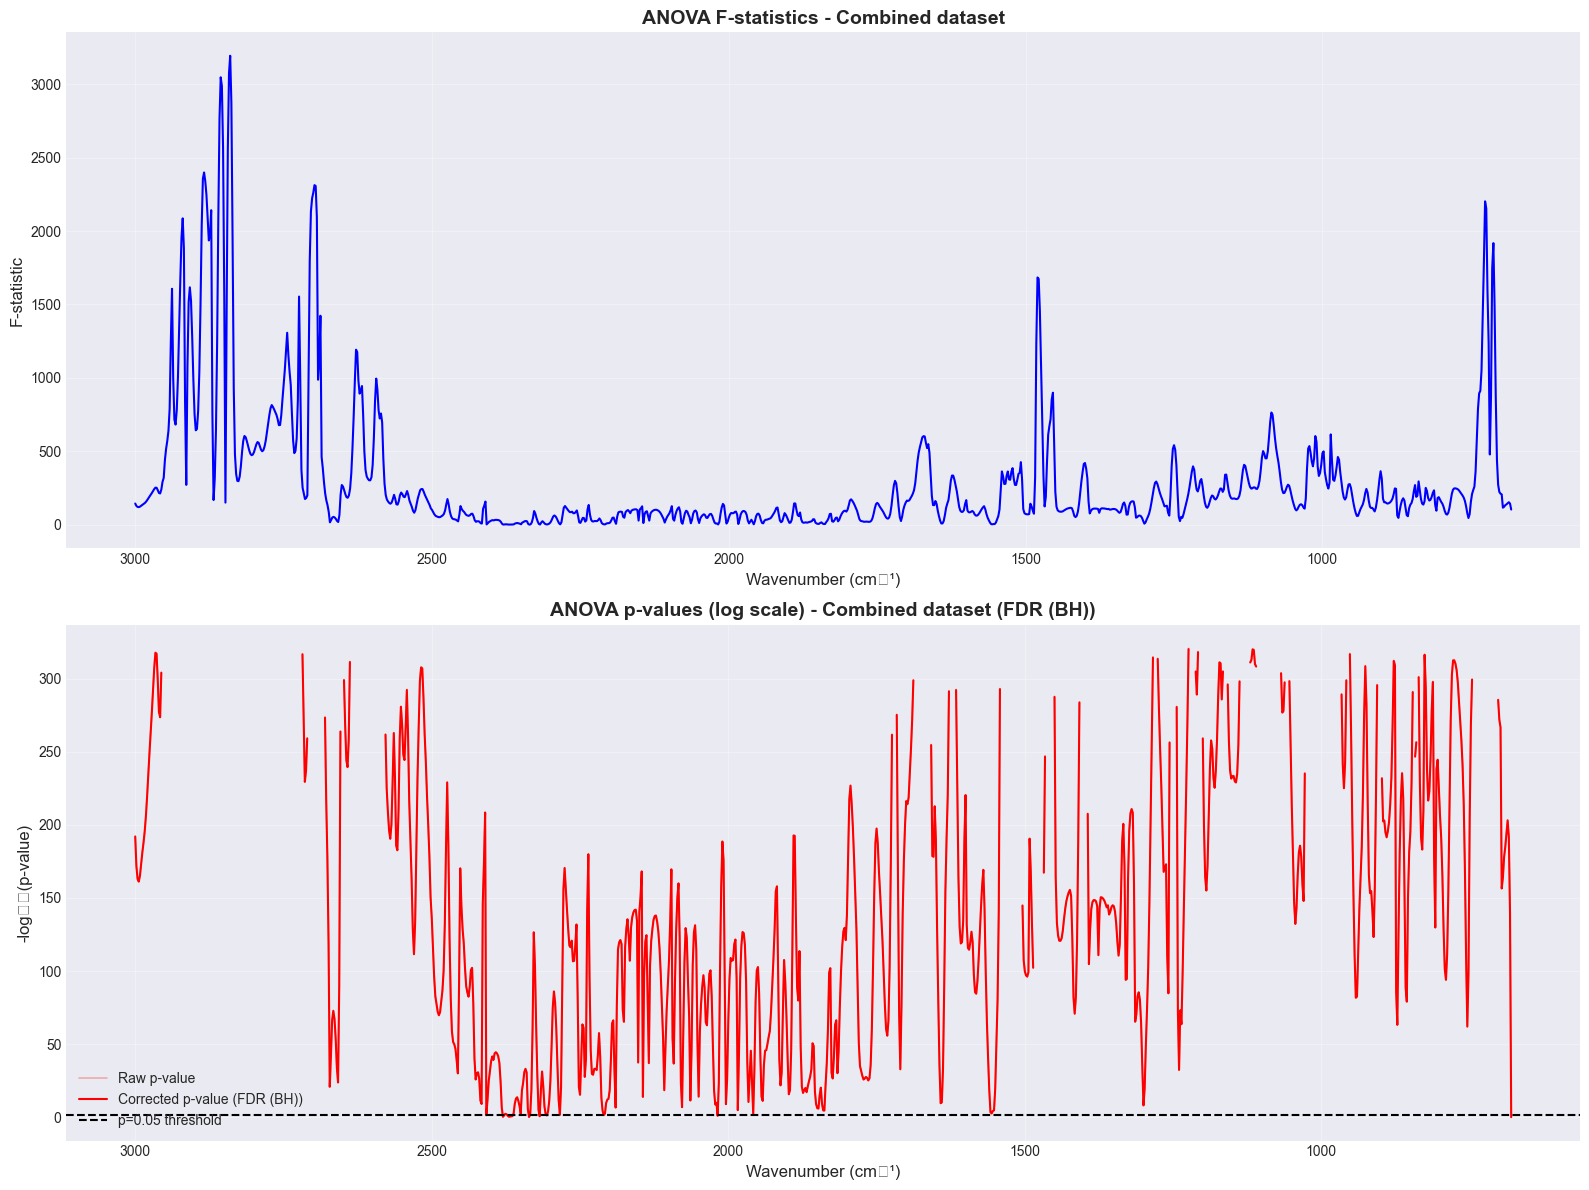


ANOVA Summary for Combined dataset:
  Total wavenumbers: 1161
  Mean F-statistic: nan
  Max F-statistic: nan at 680.0 cm⁻¹

  Multiple testing correction: FDR (BH)
  Significant features (raw p < 0.05): 1149 (99.0%)
  Significant features (corrected p < 0.05): 1149 (99.0%)


{'wavenumbers': array([ 680.,  682.,  684., ..., 2996., 2998., 3000.], shape=(1161,)),
 'f_statistics': array([         nan, 103.30825658, 144.02485931, ..., 121.14104873,
        127.98762028, 144.25815164], shape=(1161,)),
 'p_values': array([1.00000000e+000, 6.29990858e-141, 8.76131640e-193, ...,
        5.86754764e-164, 1.14712719e-172, 4.49576355e-193], shape=(1161,)),
 'p_values_corrected': array([1.00000000e+000, 1.04787878e-140, 1.83940115e-192, ...,
        1.08821451e-163, 2.21599779e-172, 9.45576356e-193], shape=(1161,)),
 'significant': array([False,  True,  True, ...,  True,  True,  True], shape=(1161,))}

In [10]:
fda.perform_anova(
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

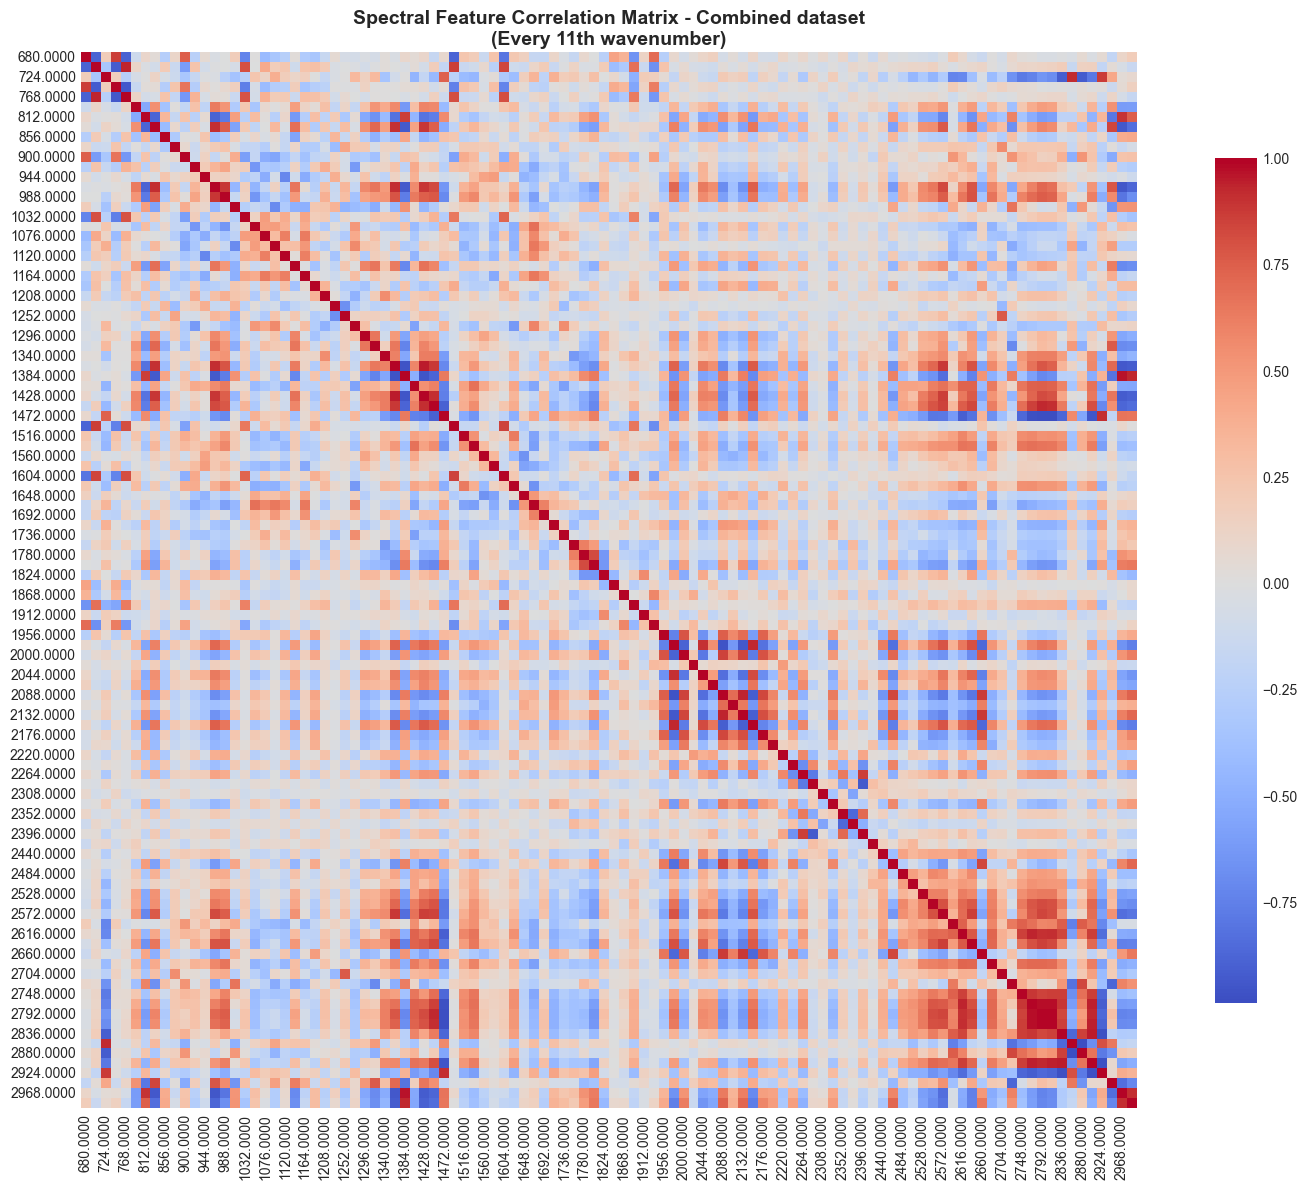


Correlation Summary for Combined dataset:
  Mean correlation: 0.013
  Max correlation: 0.993
  Min correlation: -0.988


In [11]:
fda.plot_correlation(
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)


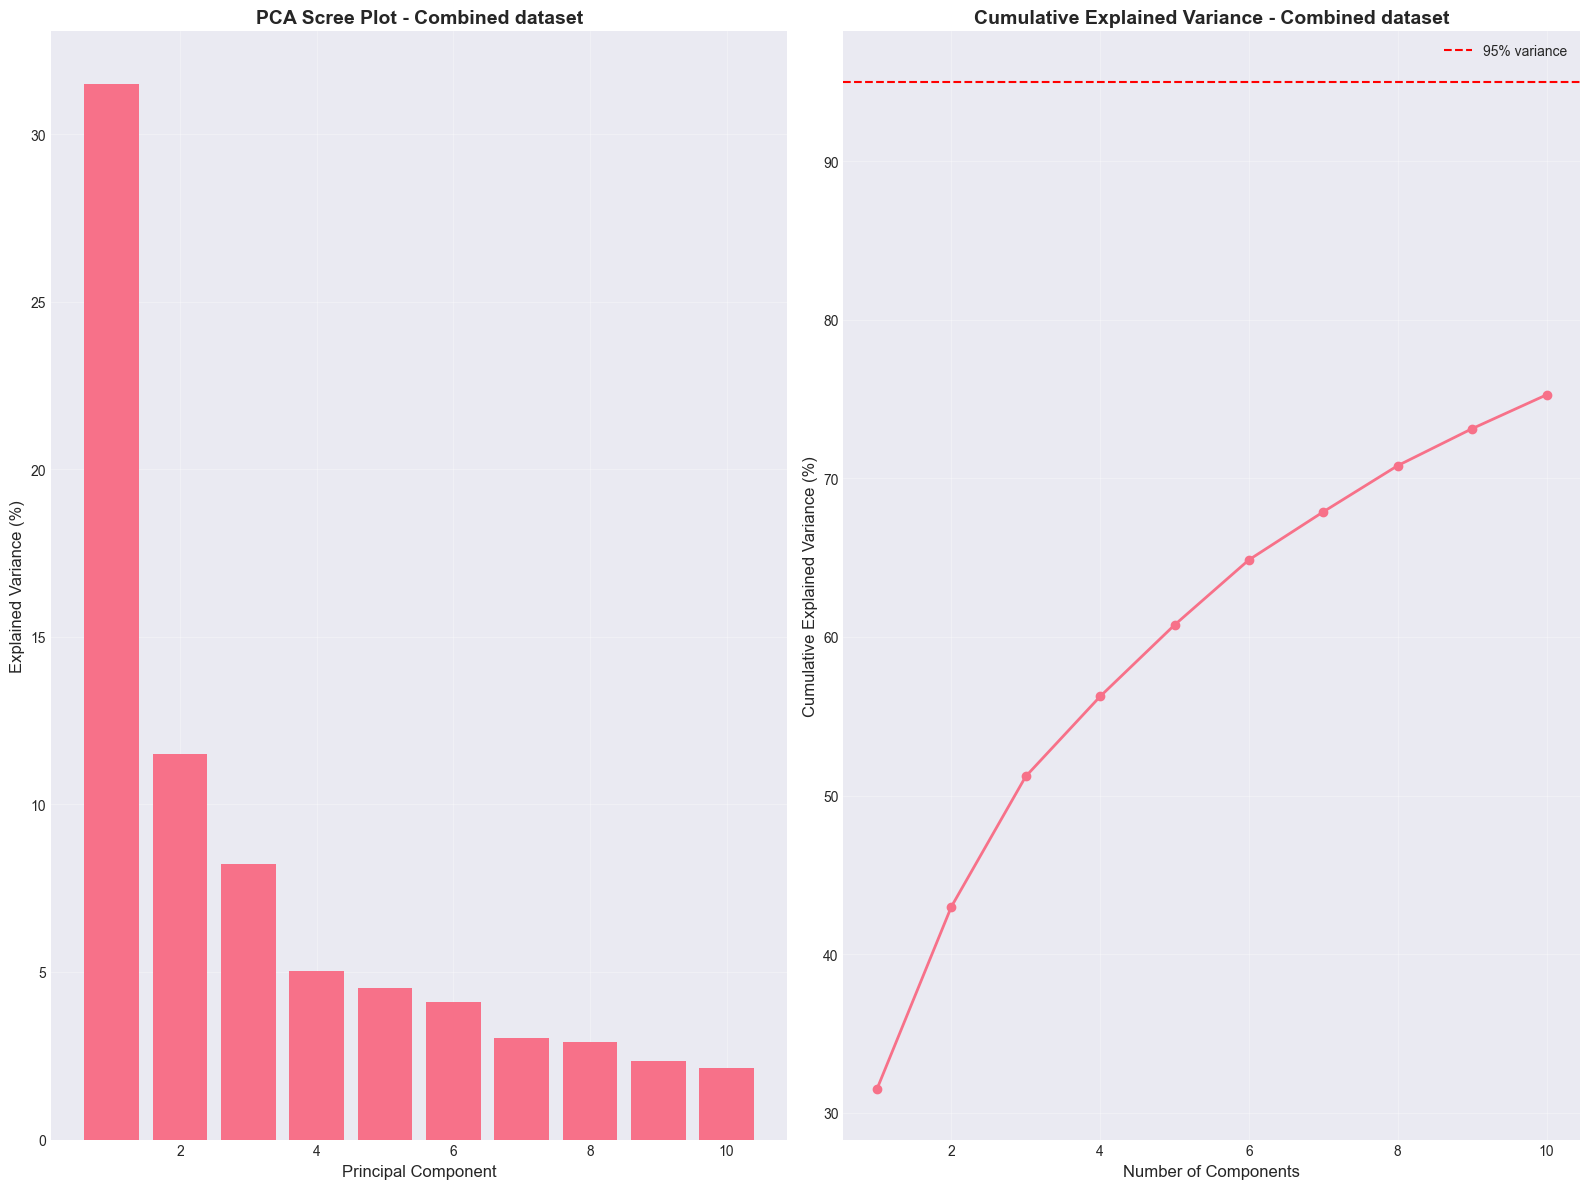


PCA Summary for Combined dataset:
  PC1 explains: 31.49%
  PC2 explains: 11.50%
  First 2 PCs explain: 42.99%
  First 3 PCs explain: 51.20%
  Components needed for 95% variance: 1


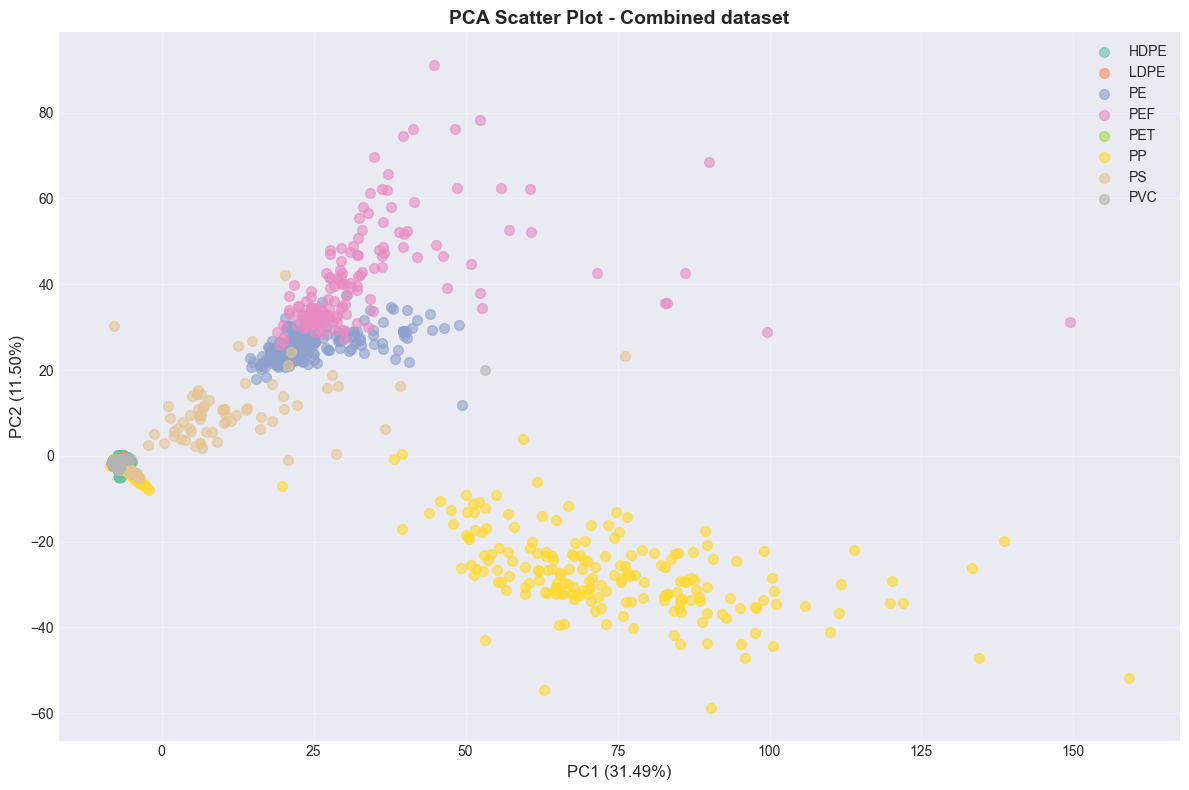

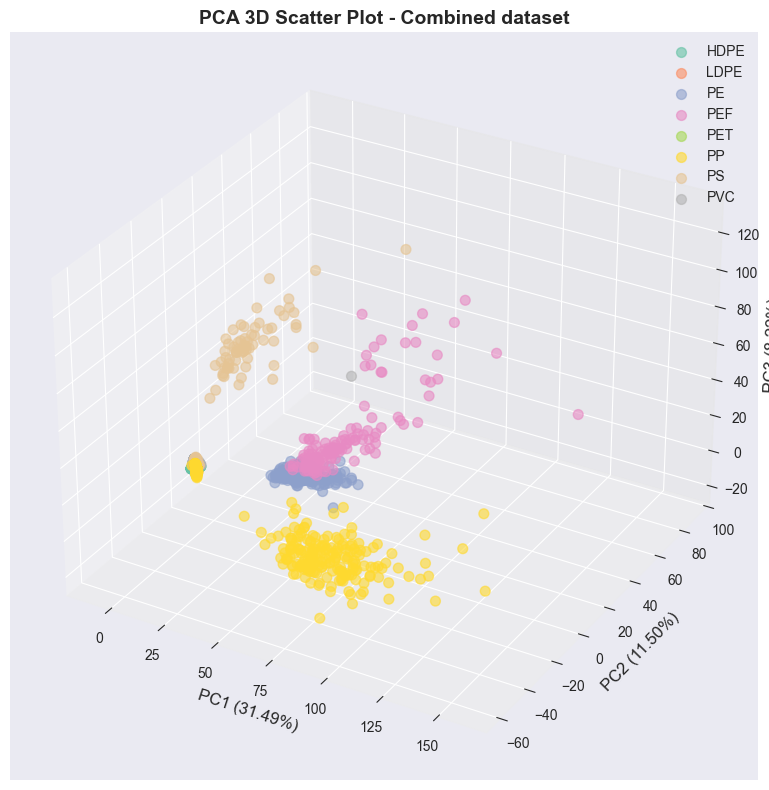

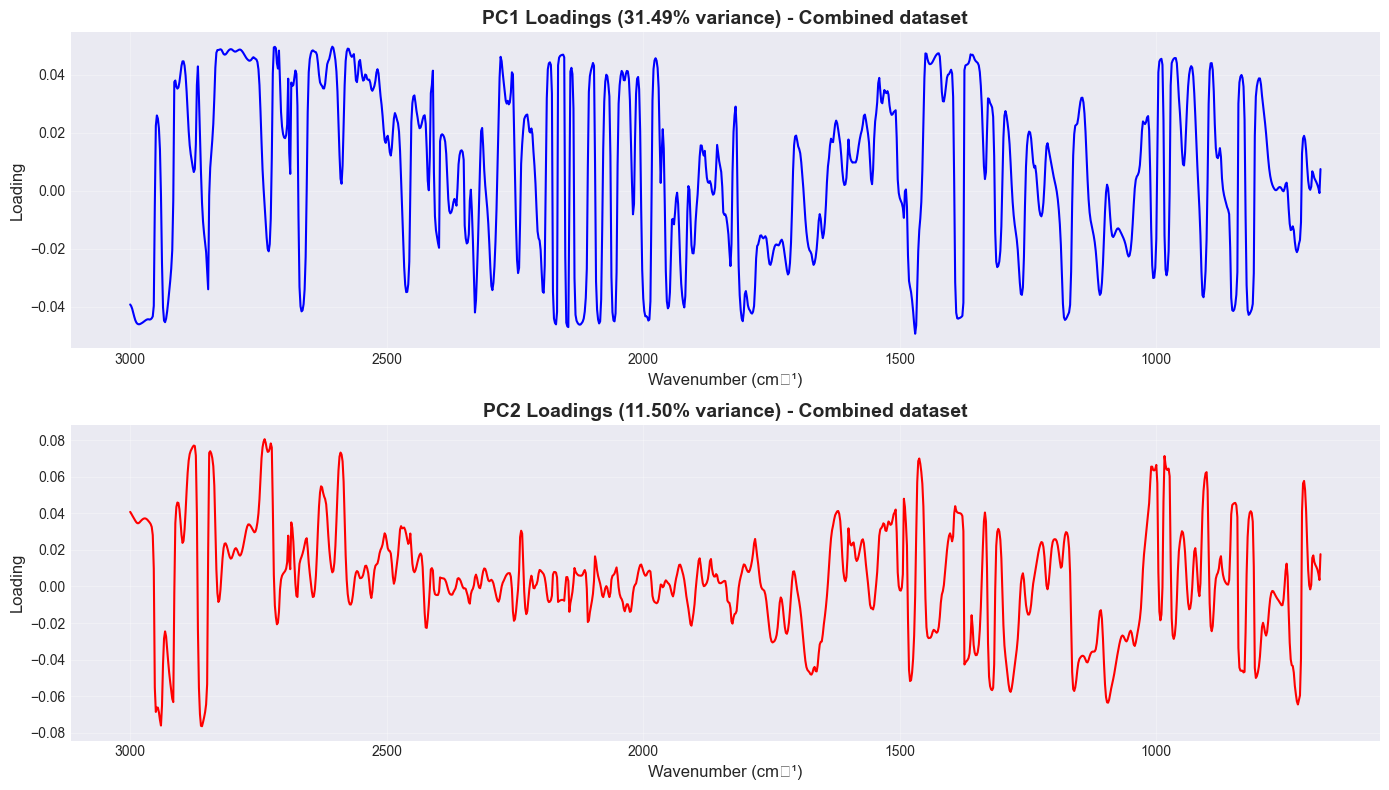

In [12]:
fda.plot_pca(
            standardize=True,
            handle_missing= "zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing t-SNE for Combined dataset...
  Using 20 PCA components as input
  Perplexity: 50
  Iterations: 1000
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4642 samples in 0.000s...
[t-SNE] Computed neighbors for 4642 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4642
[t-SNE] Computed conditional probabilities for sample 2000 / 4642
[t-SNE] Computed conditional probabilities for sample 3000 / 4642
[t-SNE] Computed conditional probabilities for sample 4000 / 4642
[t-SNE] Computed conditional probabilities for sample 4642 / 4642
[t-SNE] Mean sigma: 0.086665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.349312
[t-SNE] KL divergence after 1000 iterations: 0.314580


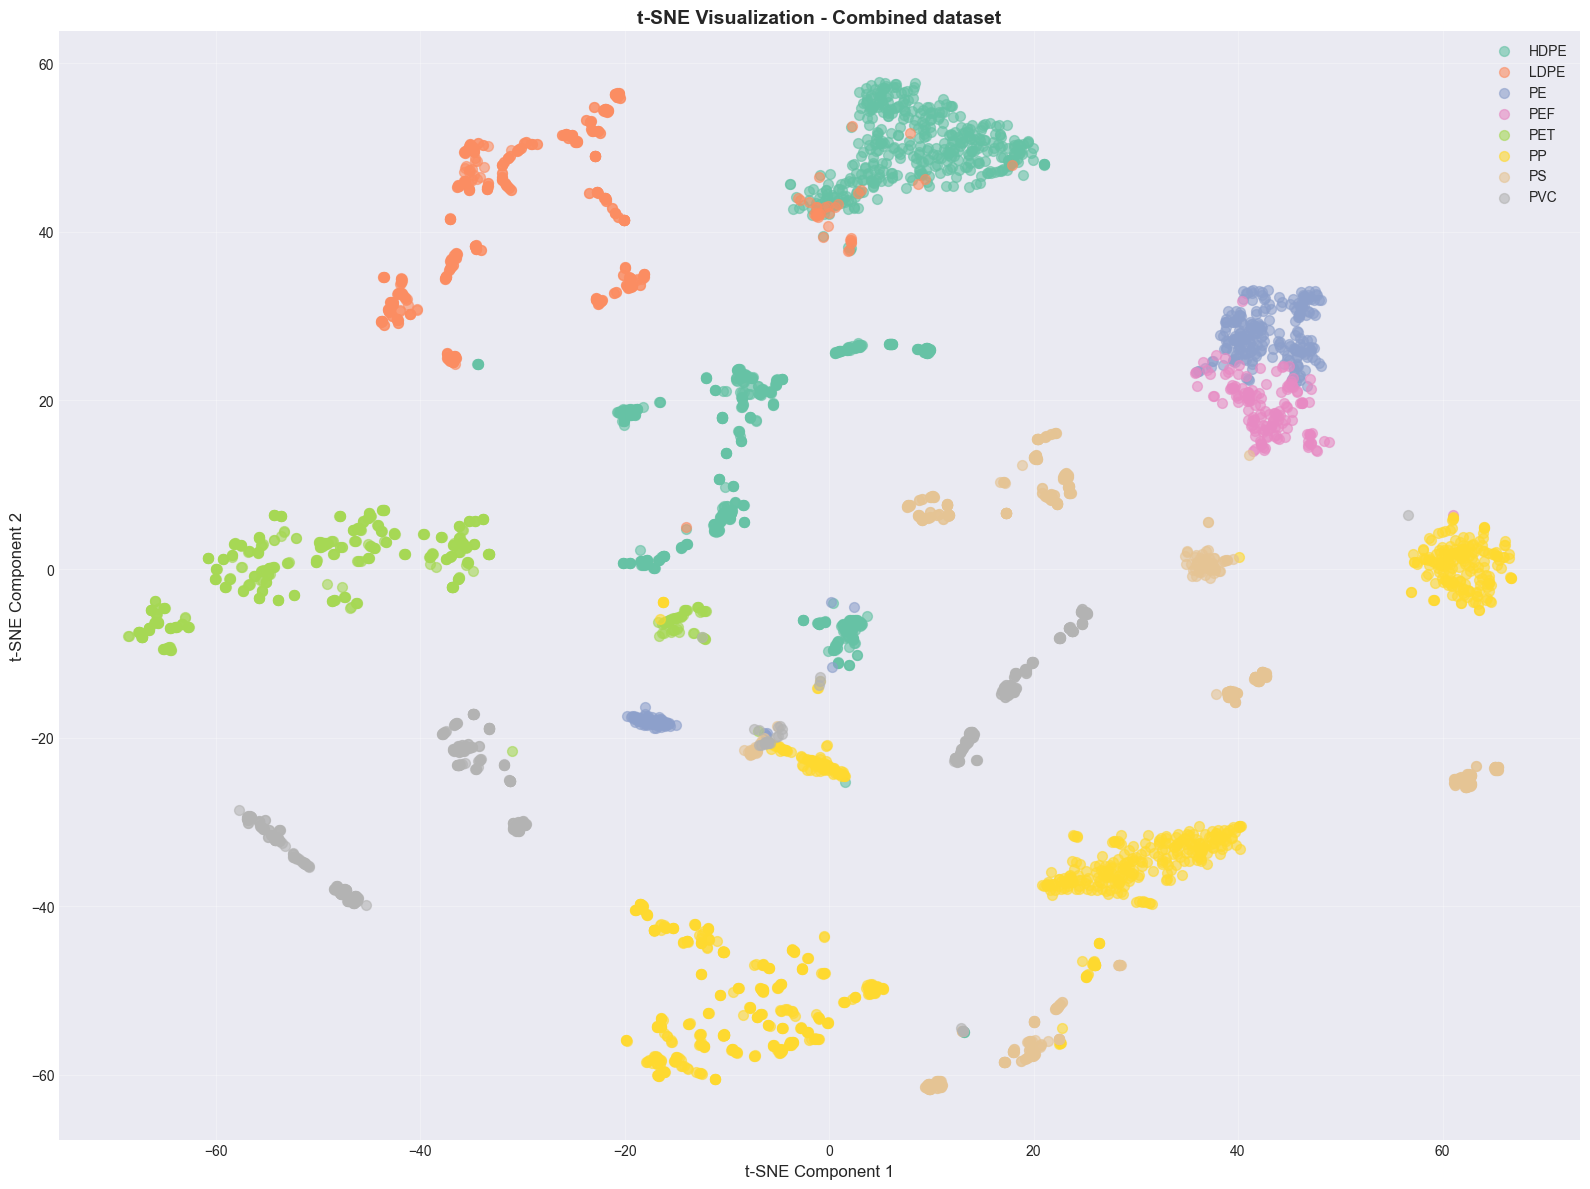

In [13]:
fda.plot_tsne(
            perplexity=50,
            n_iter=1000,
            pca_components=20,
            standardize=True,
            handle_missing= "zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing UMAP for Combined dataset...
  Using 20 PCA components as input
  n_neighbors: 100
  min_dist: 0.5
UMAP(min_dist=0.5, n_jobs=1, n_neighbors=100, random_state=42, verbose=True)
Fri Jan  9 20:08:14 2026 Construct fuzzy simplicial set
Fri Jan  9 20:08:14 2026 Finding Nearest Neighbors
Fri Jan  9 20:08:14 2026 Building RP forest with 8 trees


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Fri Jan  9 20:08:15 2026 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Fri Jan  9 20:08:19 2026 Finished Nearest Neighbor Search
Fri Jan  9 20:08:20 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Jan  9 20:08:34 2026 Finished embedding


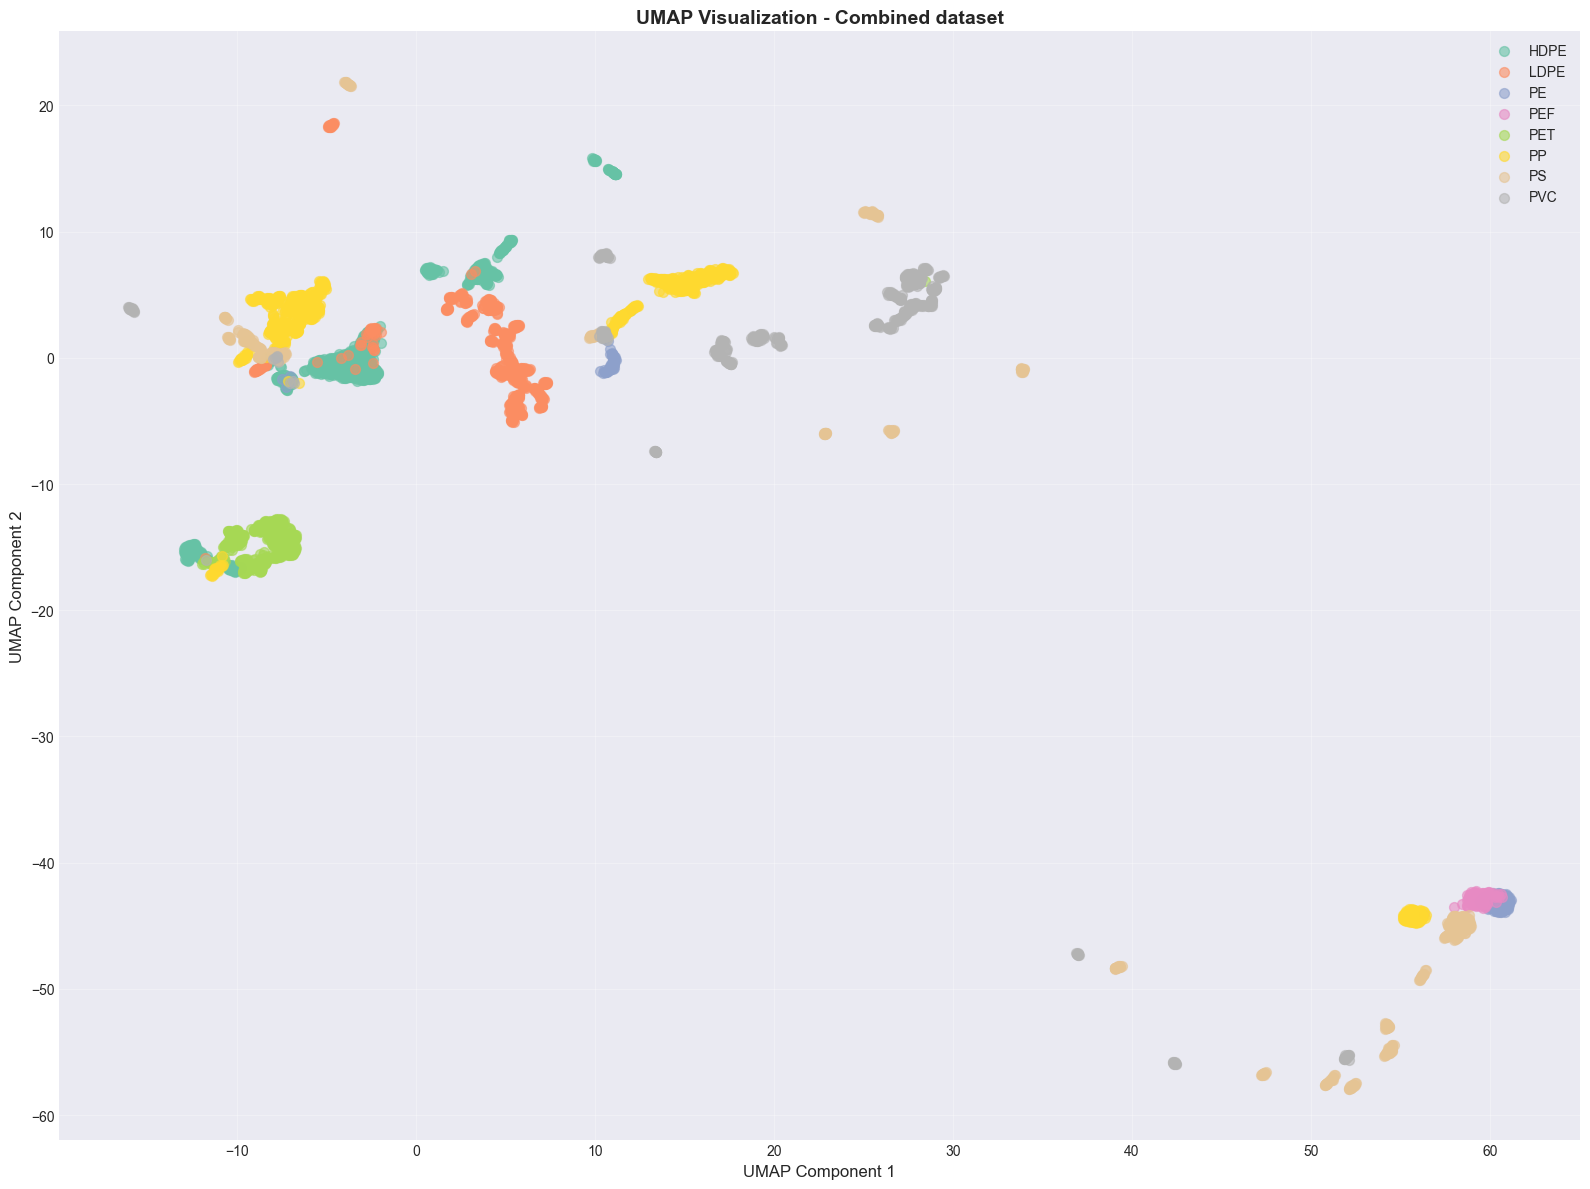

In [14]:
fda.plot_umap(
            n_neighbors=100,
            min_dist=0.5,
            pca_components=20,
            standardize=True,
            handle_missing= "zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing PLS-DA for Combined dataset...
  Number of classes: 8
  Number of components: 20
  R²X (variance explained in X): 0.6566
  R²Y (variance explained in Y): 0.3865


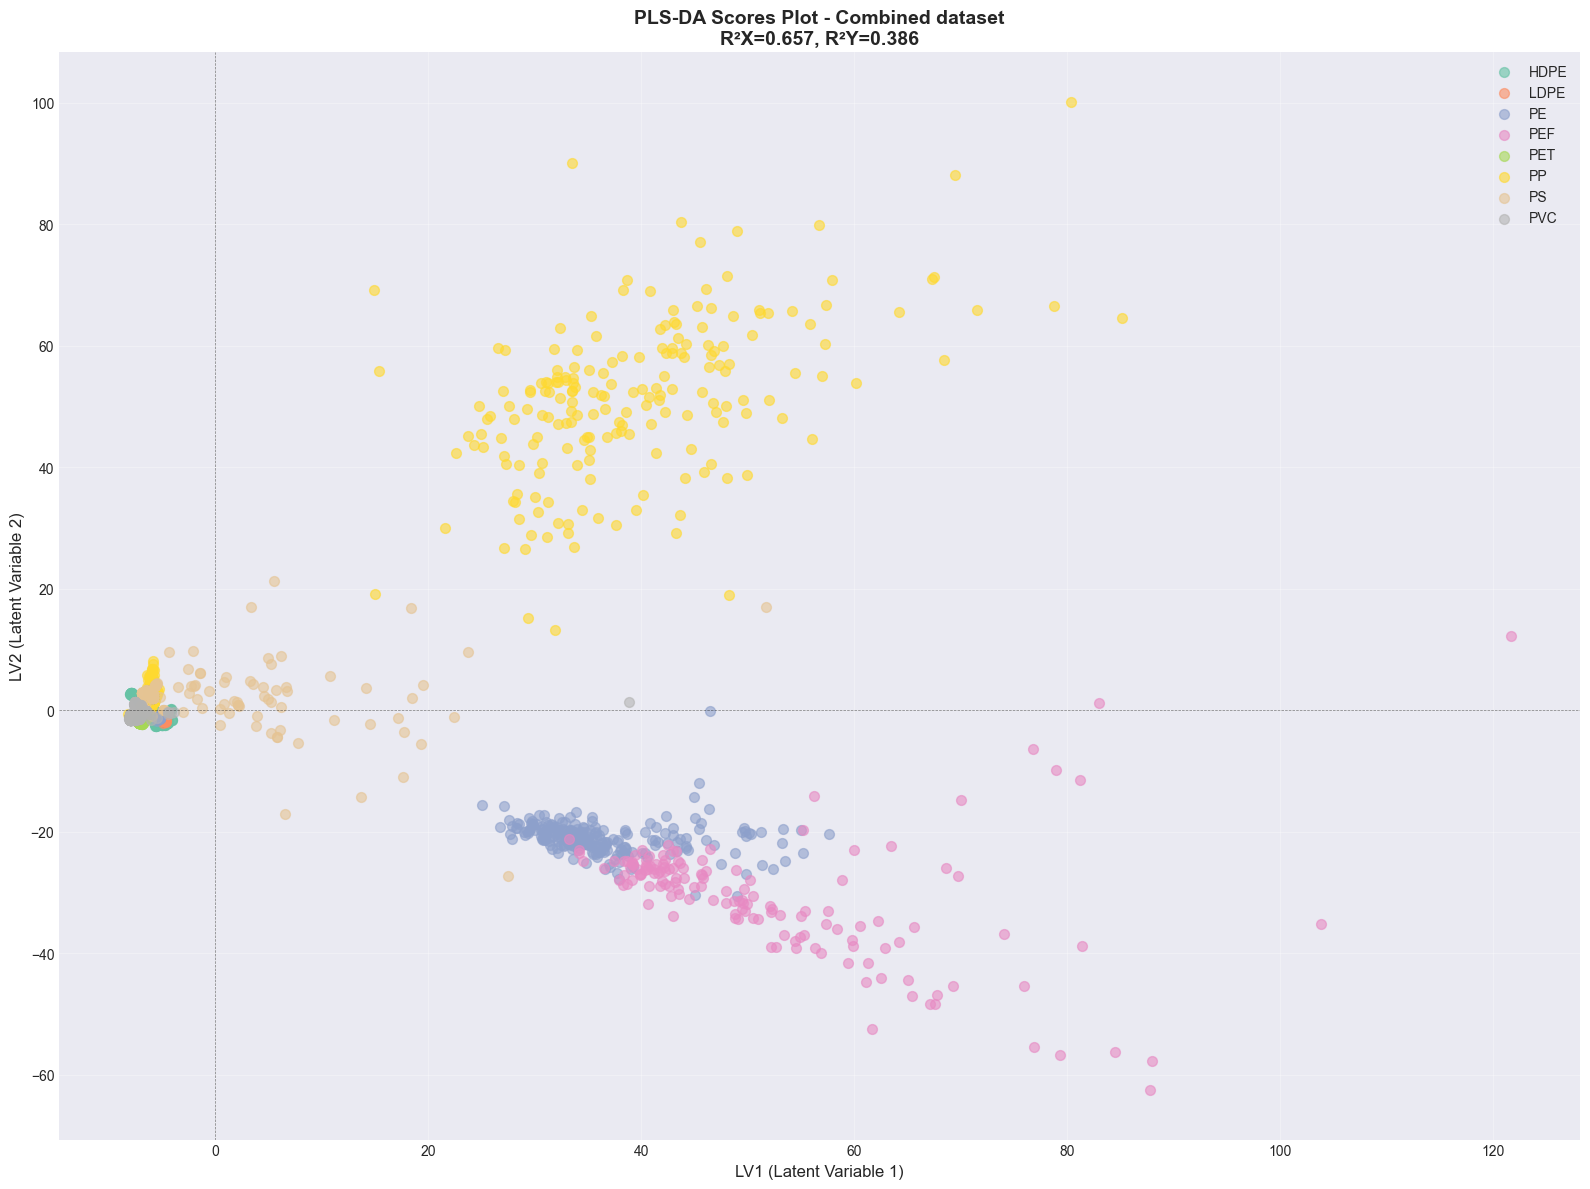

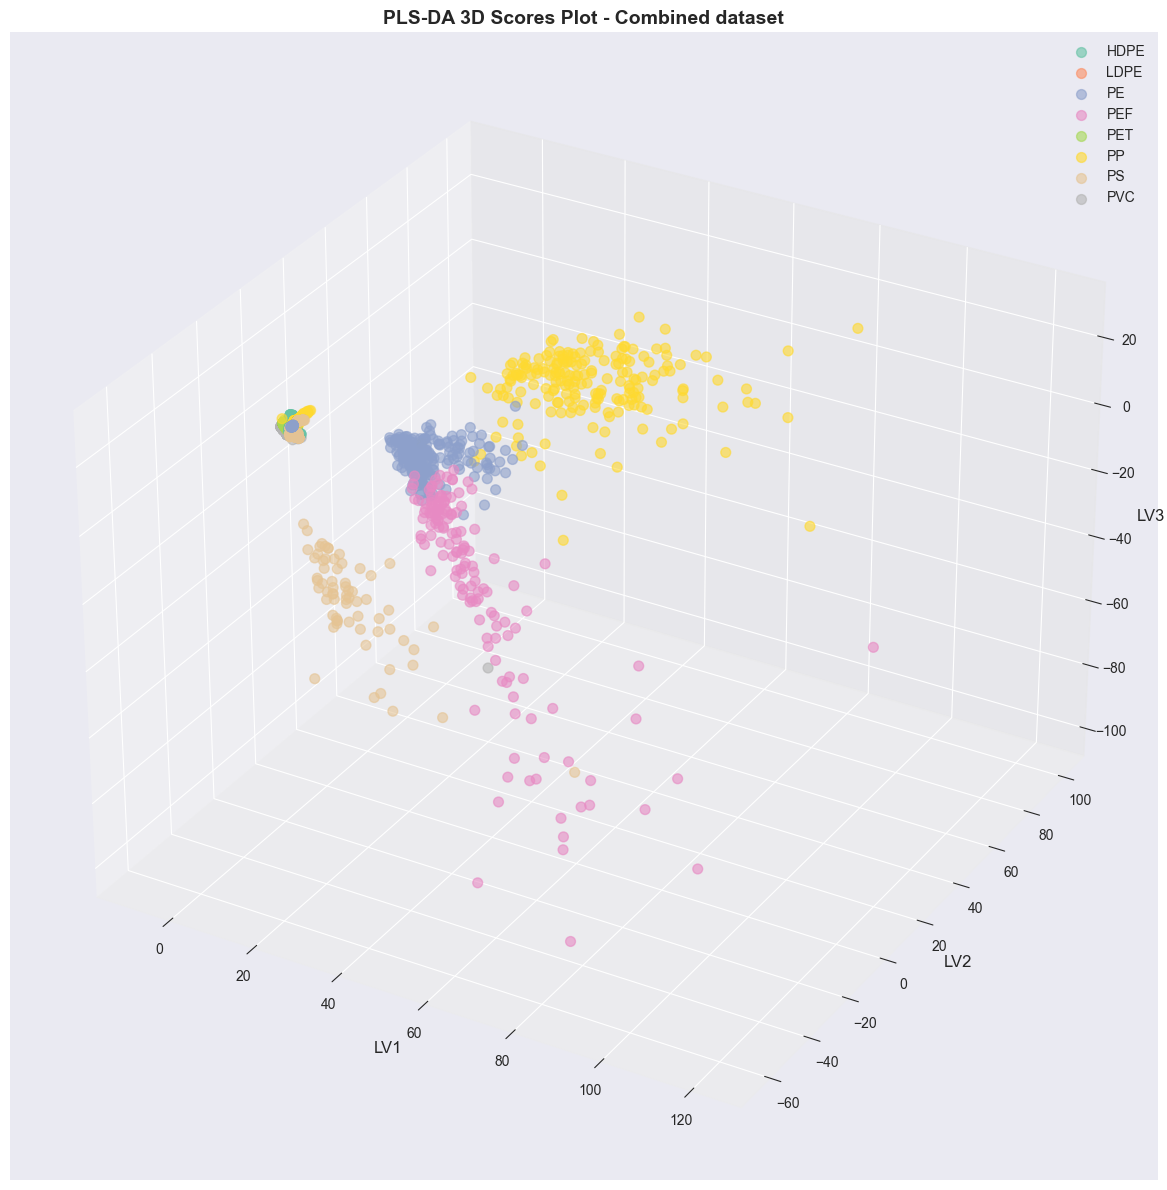

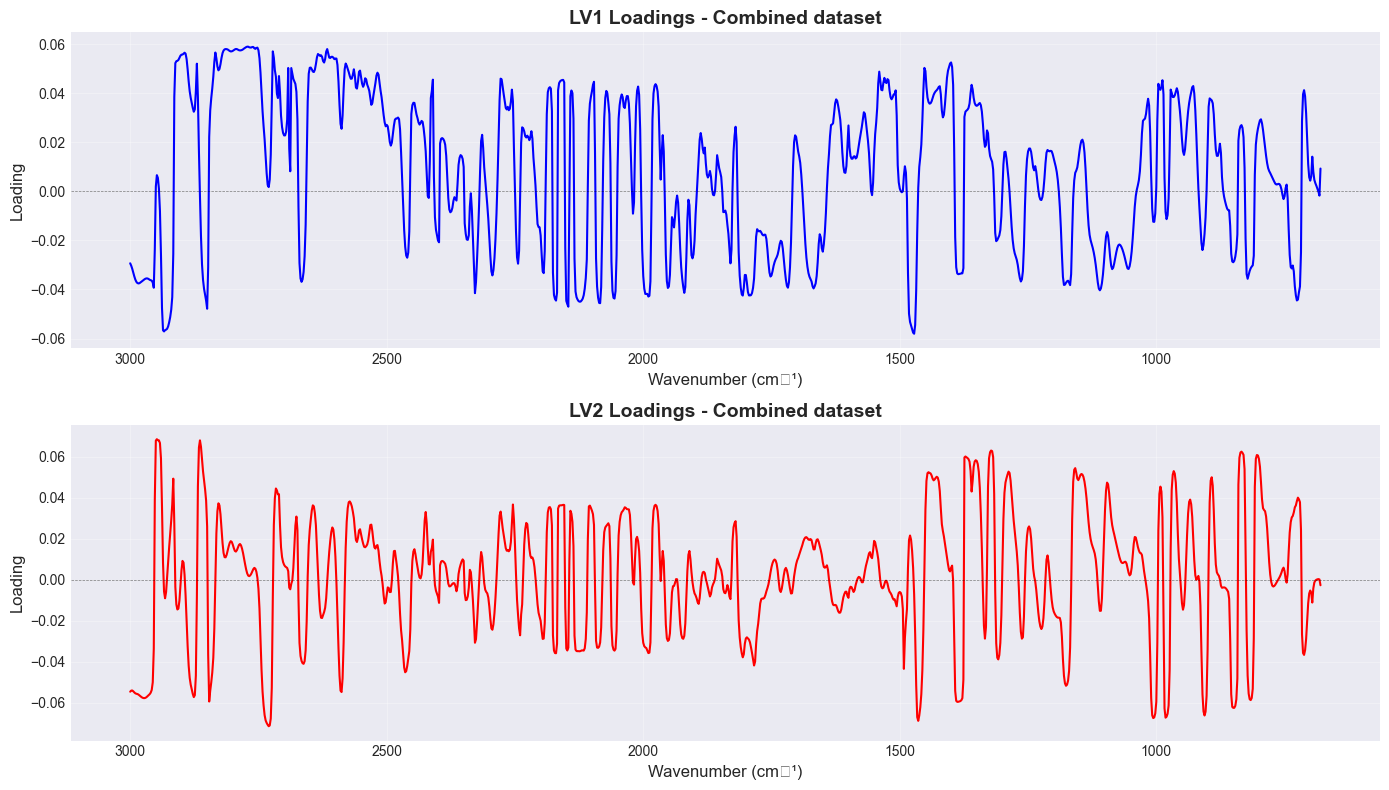

In [15]:
fda.plot_plsda(
            n_components=20,
            standardize=True,
            handle_missing= "zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing OPLS-DA for Combined dataset...
  Number of classes: 8
  Predictive components: 1
  Orthogonal components: 2
  R²X (variance explained in X): 0.4664
  R²Y (variance explained in Y): -0.1412


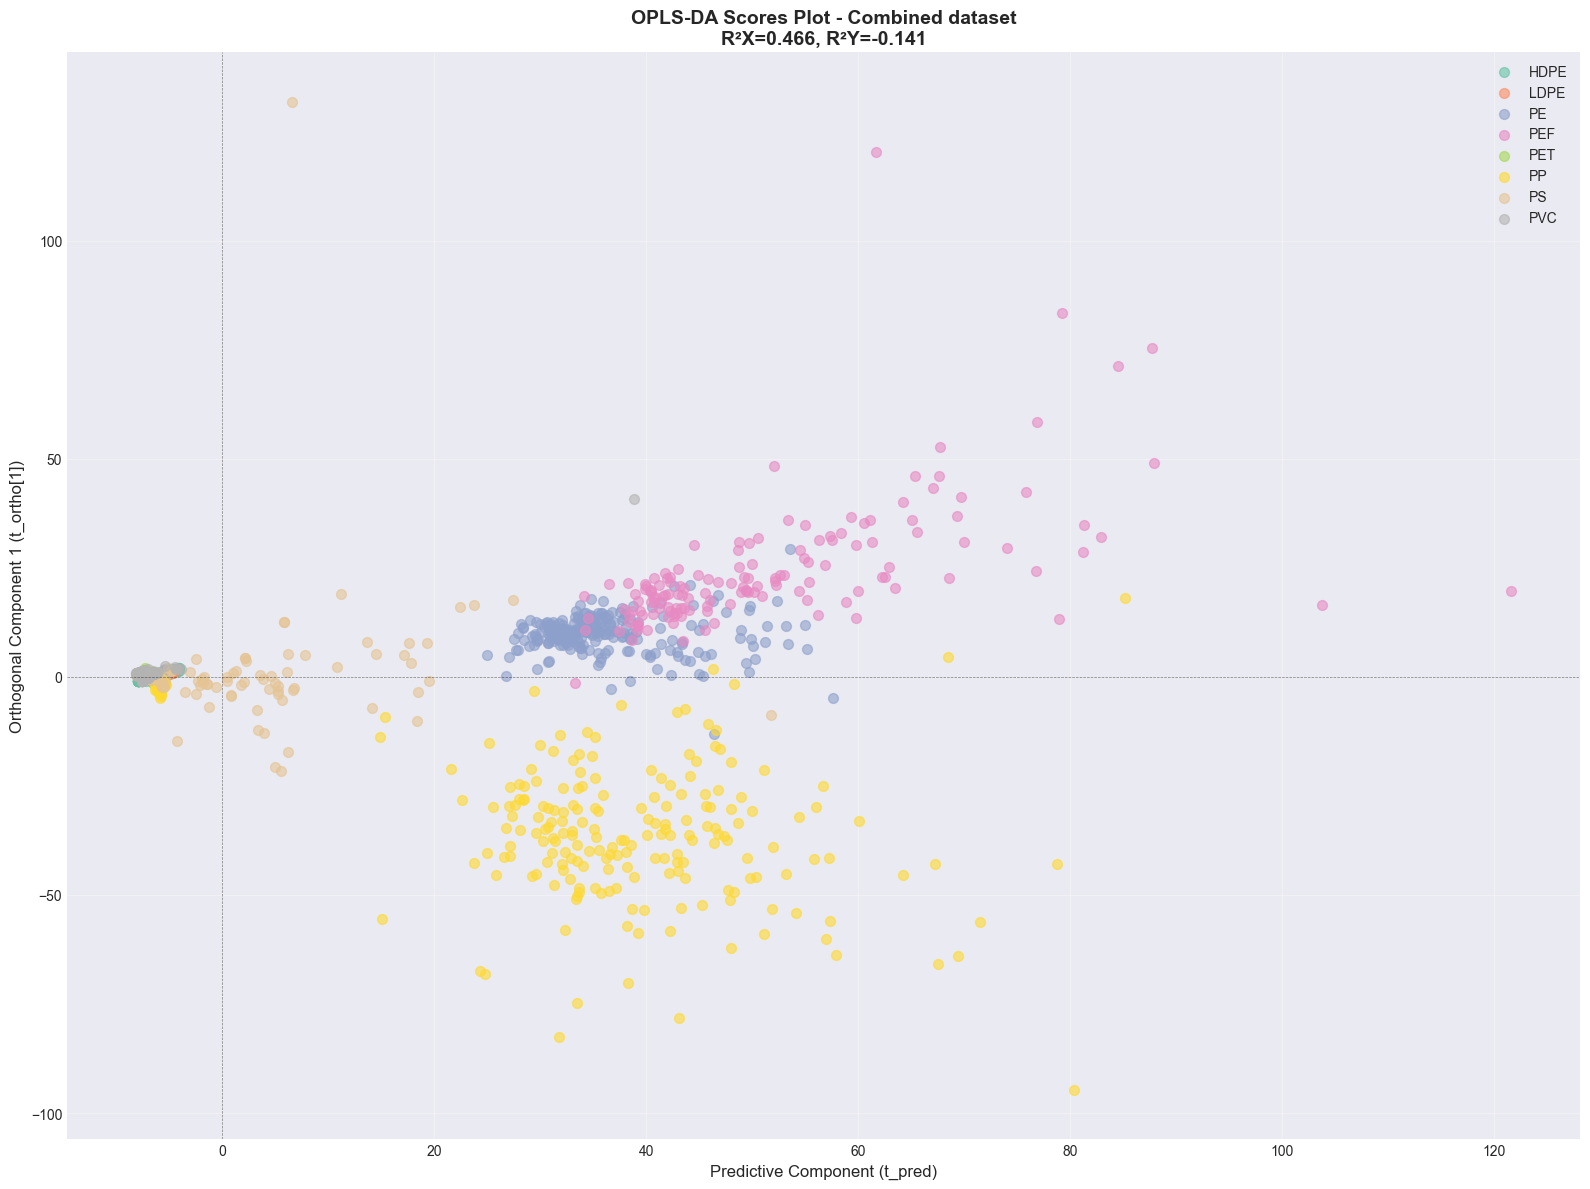

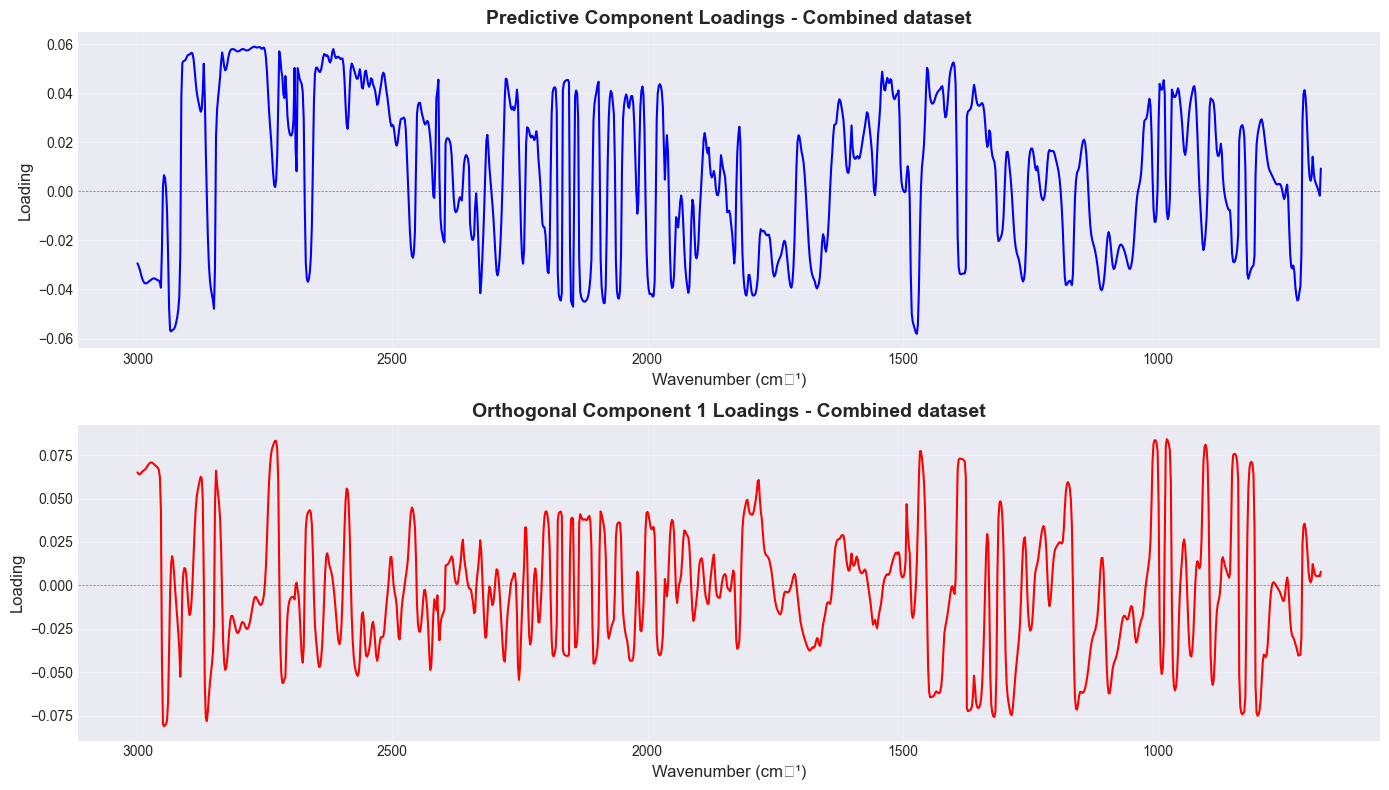

In [16]:
fda.plot_oplsda(
            n_components=1,
            n_orthogonal=2,
            standardize=True,
            handle_missing="zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
)

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing K-Means Clustering for Combined dataset...
  Using 10 PCA components for clustering


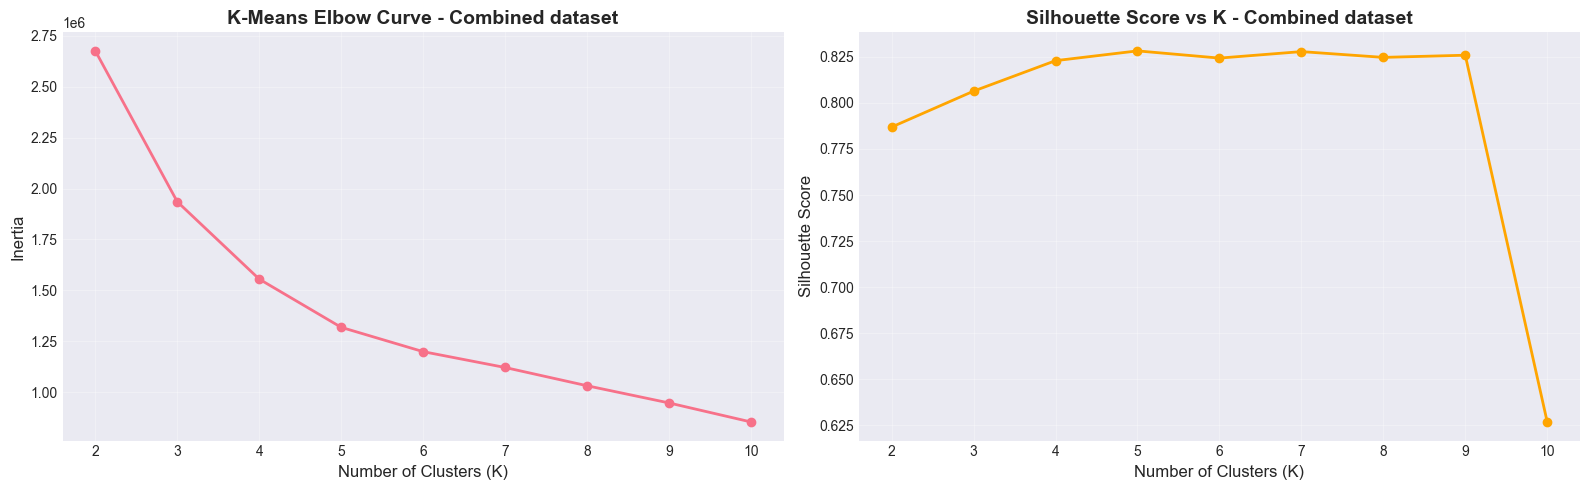


K-Means Clustering Summary for Combined dataset:
  Number of clusters: 8
  Silhouette Score: 0.825 (higher is better, range [-1, 1])
  Davies-Bouldin Score: 0.943 (lower is better)
  Calinski-Harabasz Score: 1939.36 (higher is better)


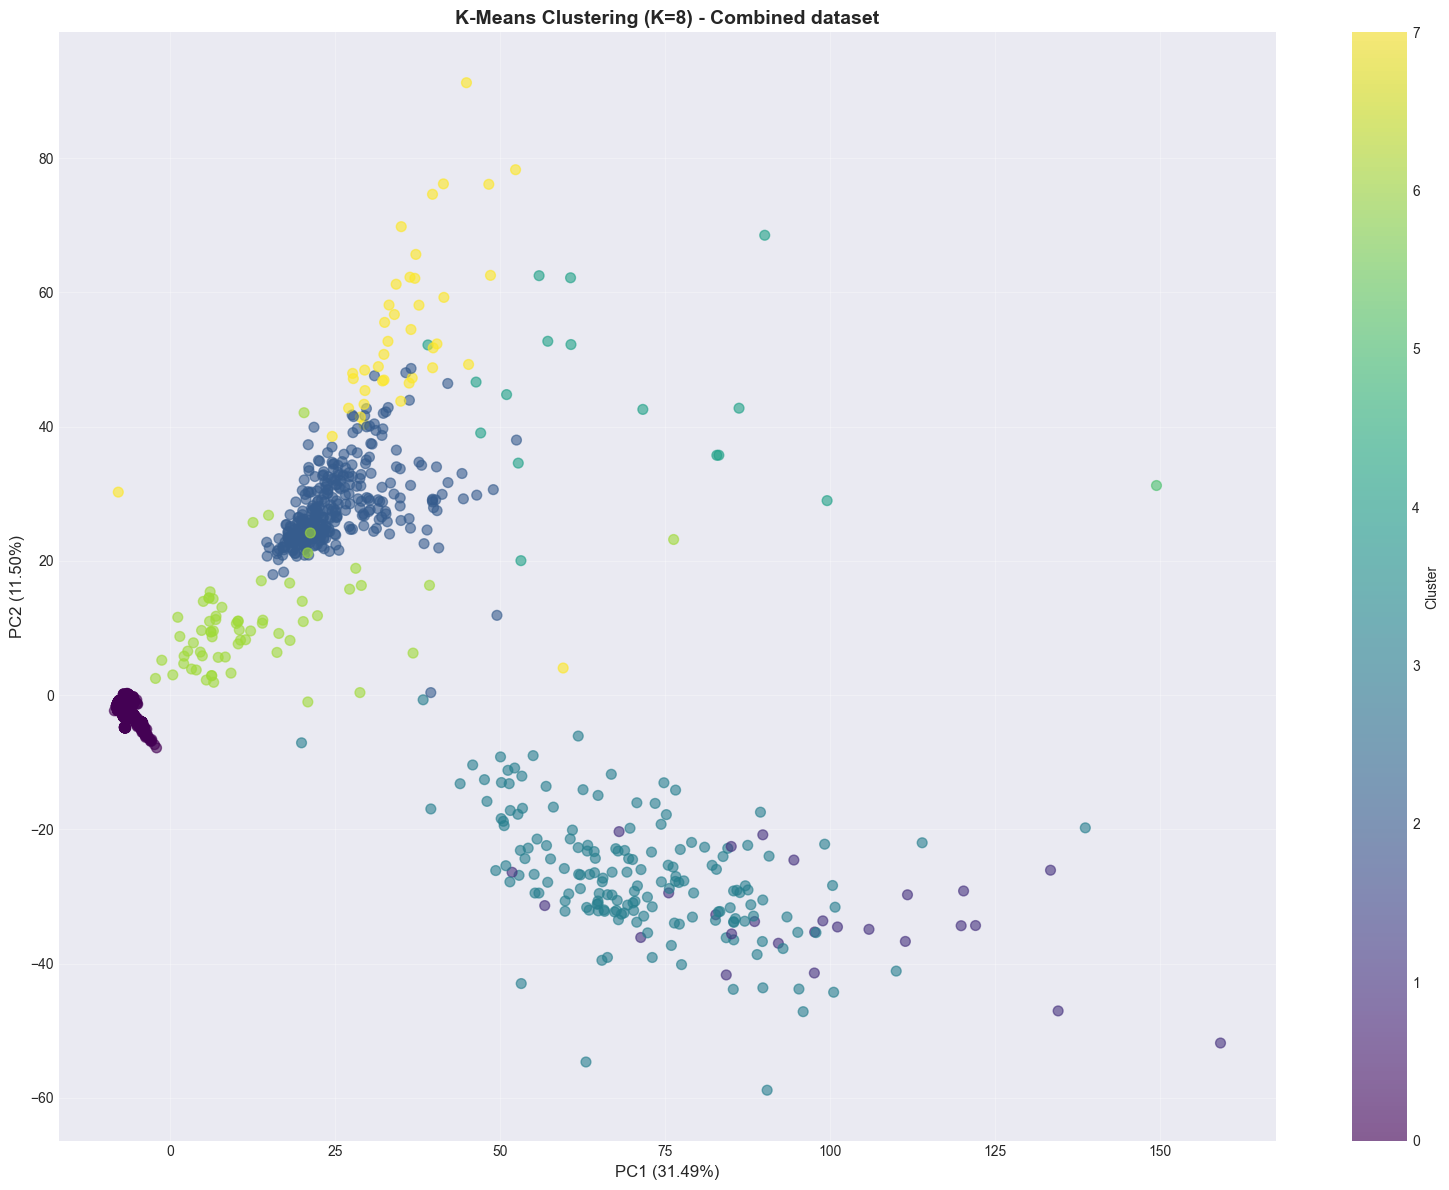

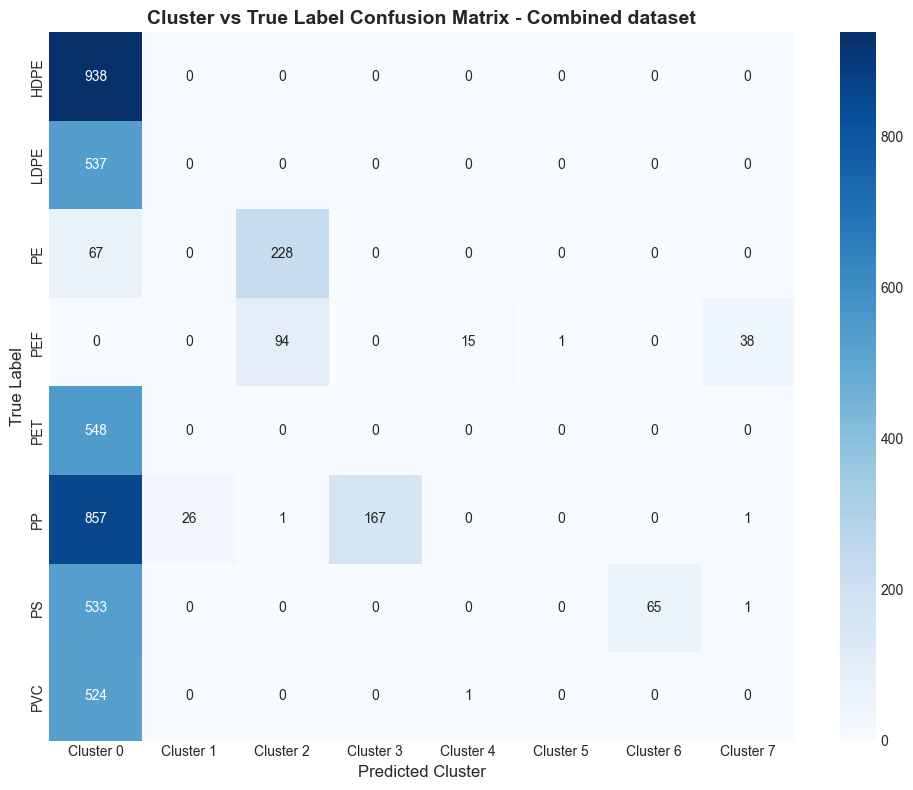

In [17]:
fda.plot_kmeans_clus(
            n_clusters=8,
            pca_components=20,
            n_components_clustering=10,
            k_range=(2,11),
            standardize=True,
            handle_missing="zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

  Replaced NaN values with 0
Data standardized (mean=0, std=1)
Performing Hierarchical Clustering for Combined dataset...
  Using 10 PCA components for clustering
  Linkage method: ward


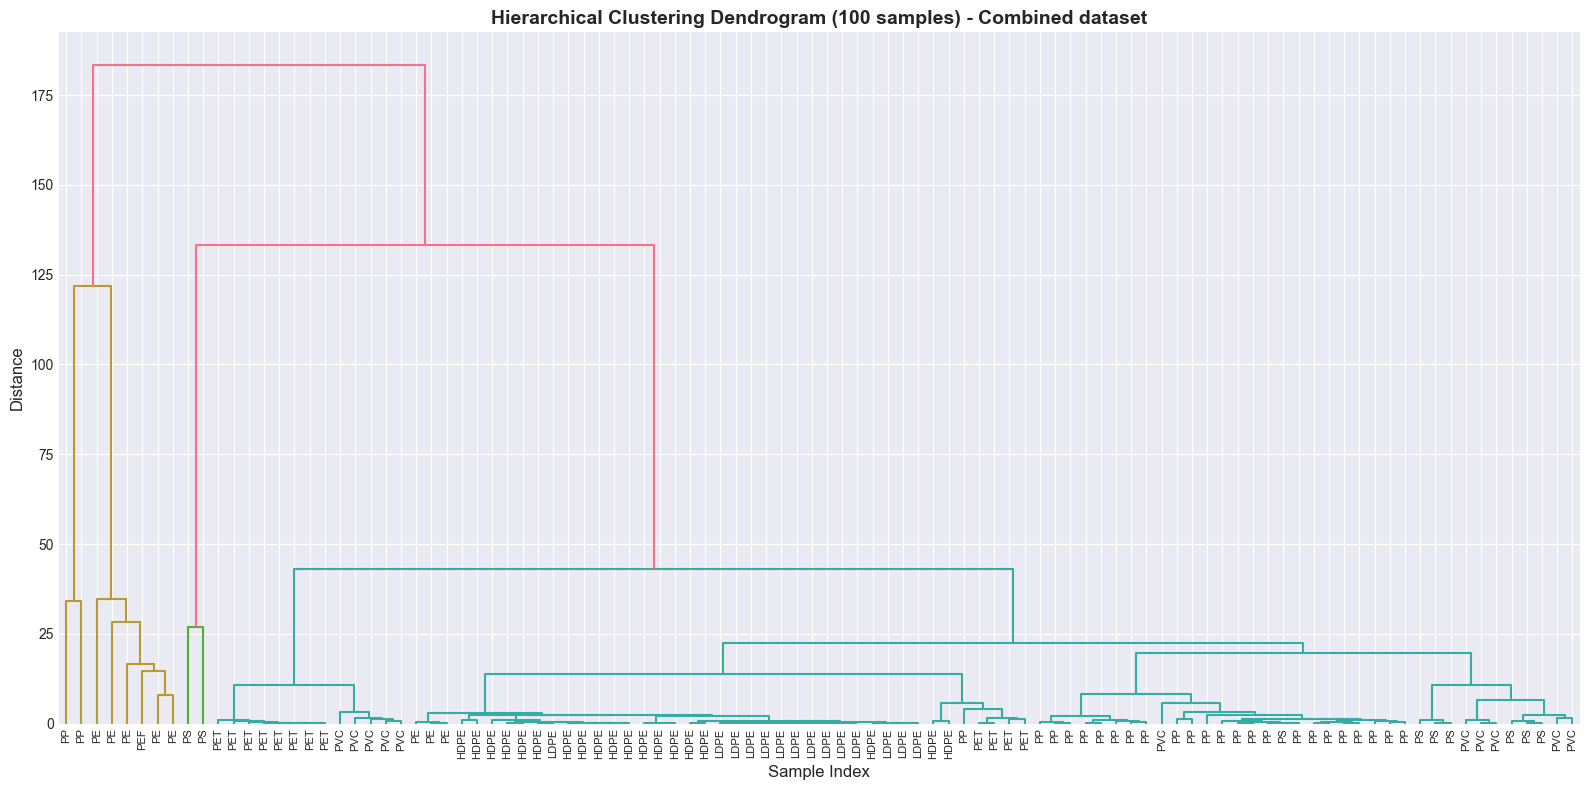


Hierarchical Clustering Summary for Combined dataset:
  Number of clusters: 8
  Silhouette Score: 0.822 (higher is better, range [-1, 1])
  Davies-Bouldin Score: 1.211 (lower is better)
  Calinski-Harabasz Score: 1958.79 (higher is better)


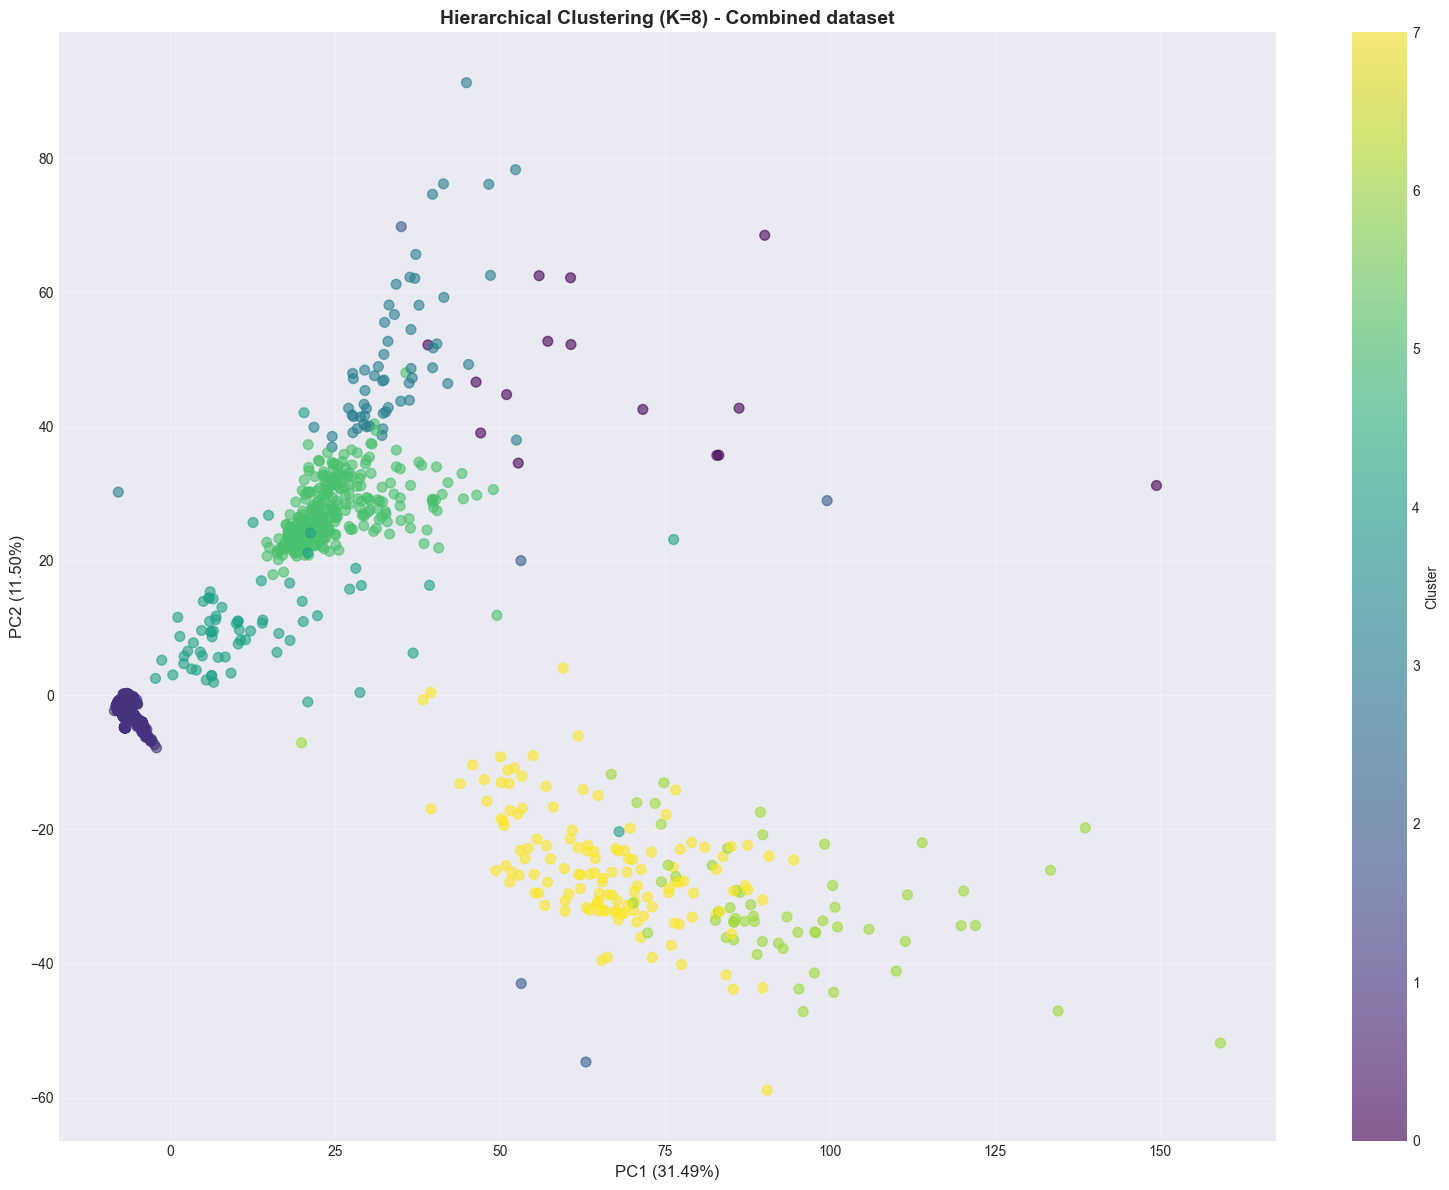

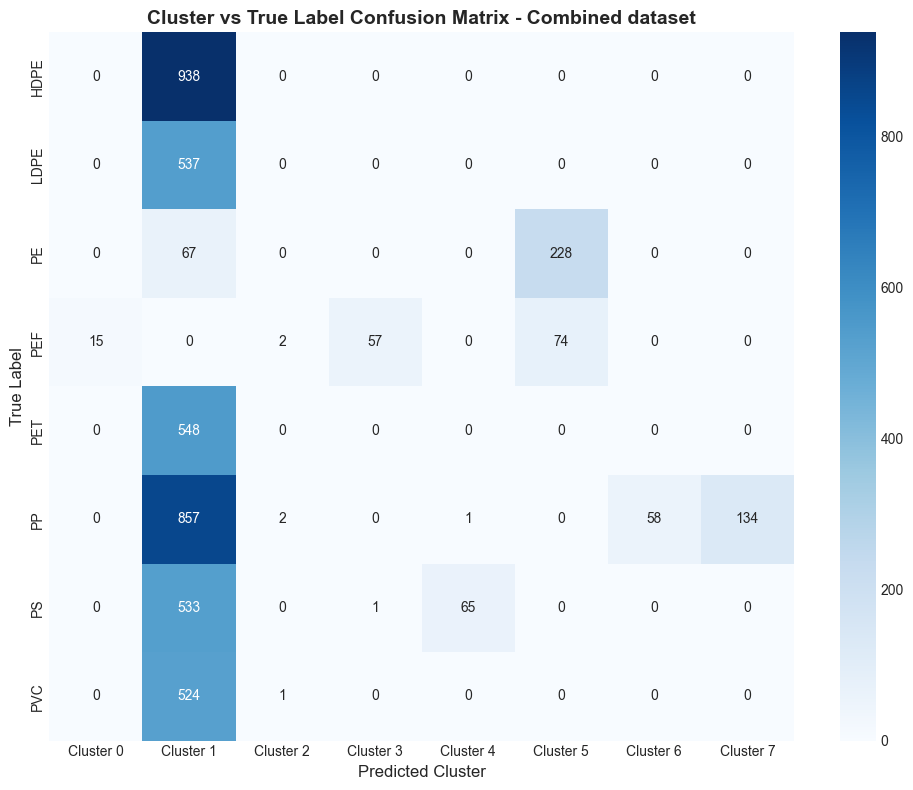

In [18]:
fda.plot_hierarchical_clus(
            n_clusters=8,
            pca_components=20,
            n_components_clustering=10,
            n_samples_dendro=100,
            standardize=True,
            handle_missing="zero",
            figsize=(16,12),
            save_plot=False,
            save_path=None,
    )

In [19]:
dir = fda.ml_prepare_data(
    test_size=0.2,
)

  Replaced NaN values with 0


In [20]:
print(fda.available_models())

{'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42), 'Ridge Classifier': RidgeClassifier(random_state=42), 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(), 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(), 'SGD Classifier': SGDClassifier(n_jobs=-1, random_state=42), 'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest (50)': RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42), 'Random Forest (100)': RandomForestClassifier(n_jobs=-1, random_state=42), 'Random Forest (200)': RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42), 'Extra Trees (100)': ExtraTreesClassifier(n_jobs=-1, random_state=42), 'Extra Trees (200)': ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=42), 'XGBoost (50)': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, ear

  Replaced NaN values with 0


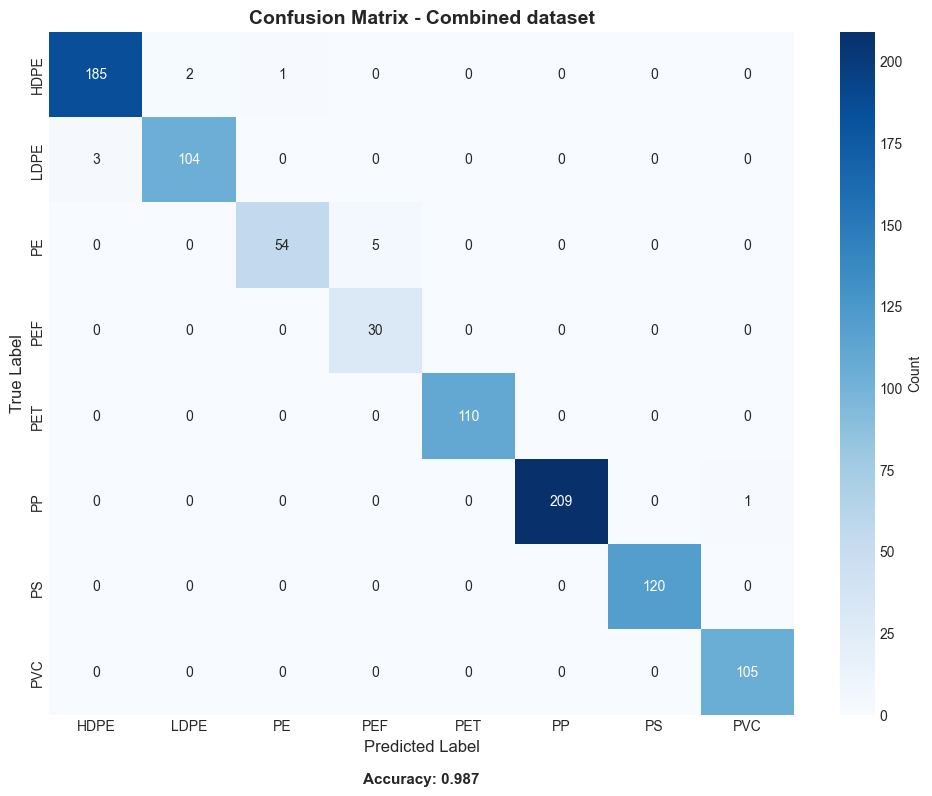

OVERALL METRICS:
--------------------------------------------------------------------------------
  Accuracy:              0.9871
  Precision (macro):     0.9743
  Precision (weighted):  0.9878
  Recall (macro):        0.9833
  Recall (weighted):     0.9871
  F1 (macro):            0.9780
  F1 (weighted):         0.9872
  MCC:                   0.9848
  Cohen's Kappa:         0.9847
  Jaccard (macro):       0.9582
  Jaccard (weighted):    0.9753
  ROC-AUC:               N/A (no probabilities)
Overall Results:
 {'accuracy': 0.9870828848223897, 'precision_macro': 0.9743377131700095, 'precision_weighted': 0.9877633202145257, 'recall_macro': 0.9833121878175187, 'recall_weighted': 0.9870828848223897, 'f1_macro': 0.977985968447441, 'f1_weighted': 0.9871652139892735, 'mcc': 0.9847697816402459, 'cohens_kappa': 0.9847400553015577, 'jaccard_macro': 0.9582077272397911, 'jaccard_weighted': 0.9752526411555569, 'roc_auc_ovr_macro': nan, 'roc_auc_ovr_weighted': nan}
Per Class Results:
   class  suppo

In [21]:
results = fda.run_a_model(
            model_name='XGBoost (100)',
            model=None,
            cv_folds=5,
            plot_confusion=True,
            save_plot_path=None,
            print_test_result=True,
    )

  Replaced NaN values with 0

EVALUATING ALL MODELS - Combined dataset

[1/36] Evaluating Logistic Regression...
  ✓ Accuracy: 0.9817 | Train time: 0.99s
[2/36] Evaluating Ridge Classifier...
  ✓ Accuracy: 0.9214 | Train time: 0.04s
[3/36] Evaluating Linear Discriminant Analysis...
  ✓ Accuracy: 0.8913 | Train time: 0.28s
[4/36] Evaluating Quadratic Discriminant Analysis...
  ✓ Accuracy: 0.5490 | Train time: 0.22s
[5/36] Evaluating SGD Classifier...
  ✓ Accuracy: 0.9806 | Train time: 0.15s
[6/36] Evaluating Decision Tree...
  ✓ Accuracy: 0.9677 | Train time: 0.68s
[7/36] Evaluating Random Forest (50)...
  ✓ Accuracy: 0.9903 | Train time: 0.10s
[8/36] Evaluating Random Forest (100)...
  ✓ Accuracy: 0.9892 | Train time: 0.17s
[9/36] Evaluating Random Forest (200)...
  ✓ Accuracy: 0.9892 | Train time: 0.29s
[10/36] Evaluating Extra Trees (100)...
  ✓ Accuracy: 0.9892 | Train time: 0.07s
[11/36] Evaluating Extra Trees (200)...
  ✓ Accuracy: 0.9882 | Train time: 0.11s
[12/36] Evaluating XGB

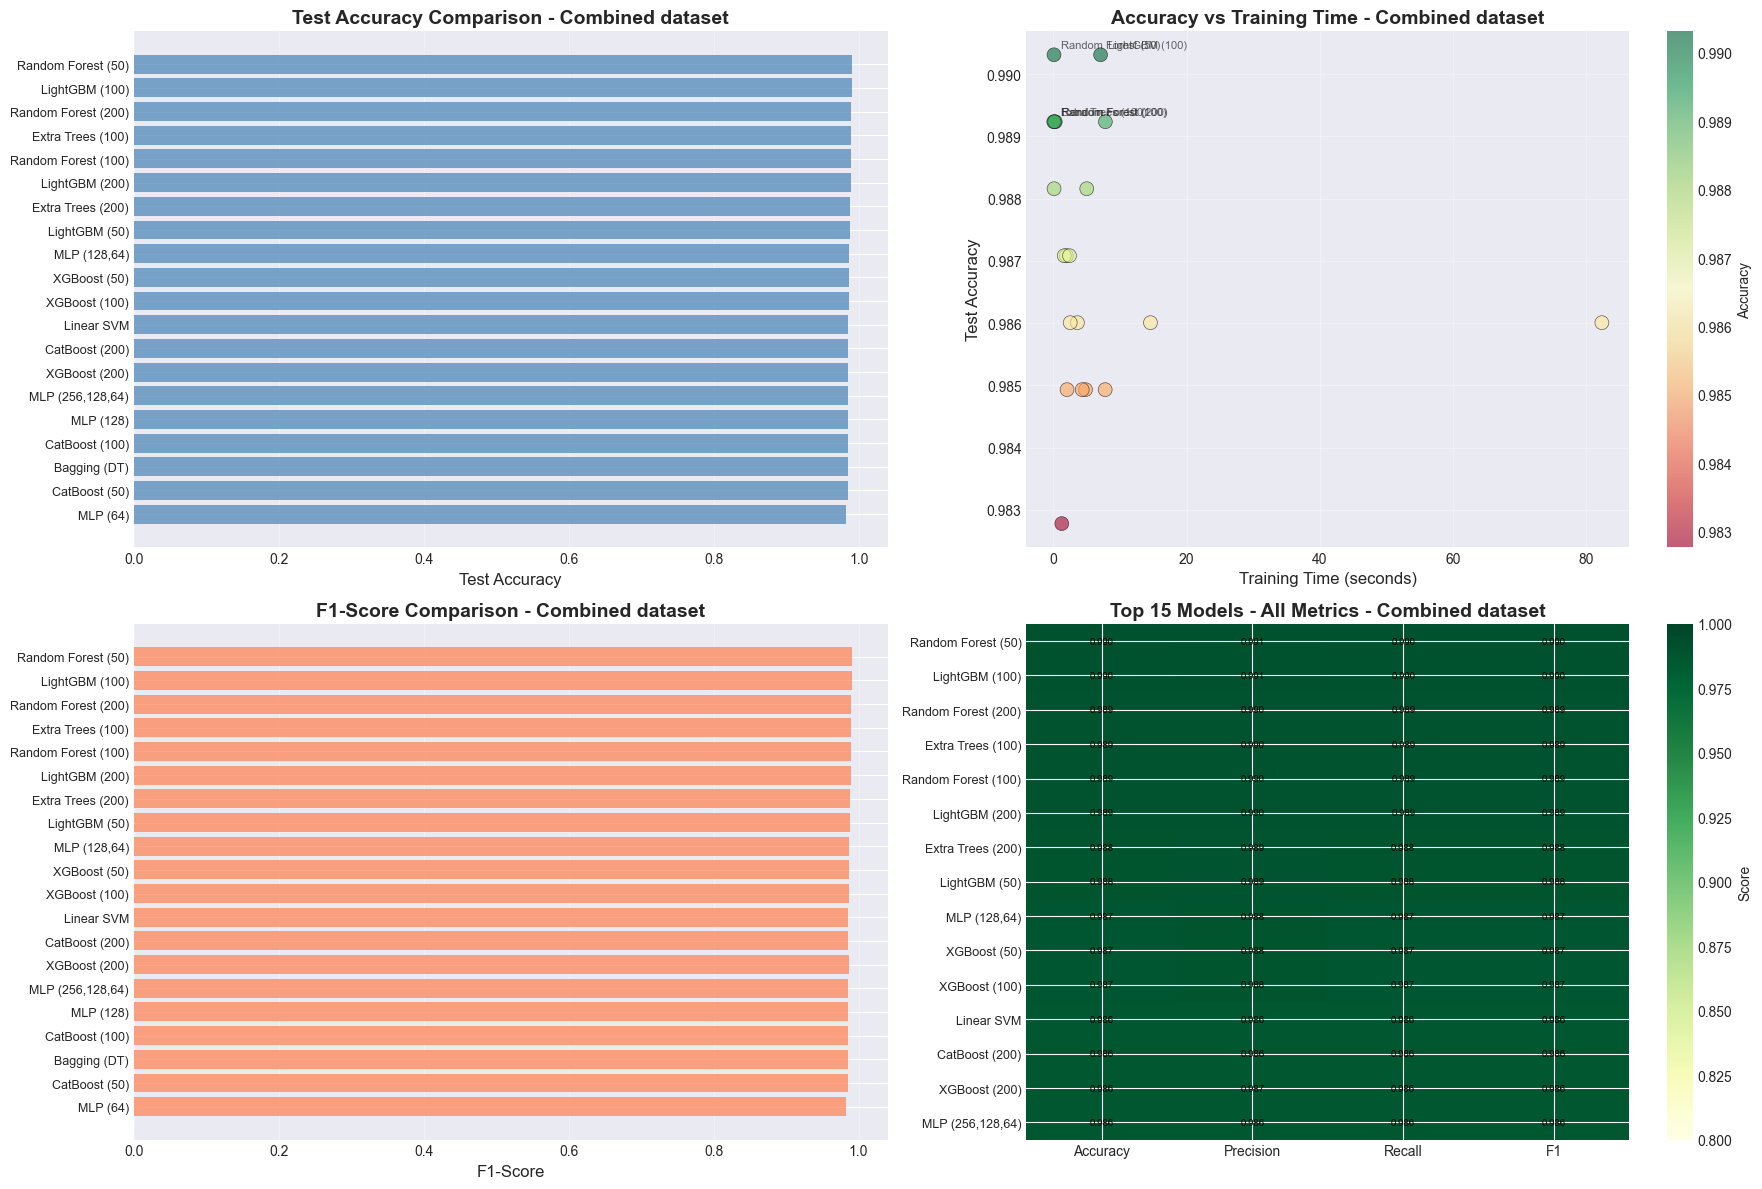


MODEL FAMILY COMPARISON - Combined dataset

        family  test_accuracy_mean  test_accuracy_max  test_accuracy_min  test_accuracy_std  train_time_mean  train_time_median  pred_time_mean  pred_time_median  model_name_count
      Boosting              0.9871             0.9903             0.9849             0.0019           6.0337             5.0178          0.0396            0.0050                 9
    Tree-Based              0.9856             0.9903             0.9677             0.0088           0.2349             0.1374          0.0125            0.0149                 6
Neural Network              0.9845             0.9871             0.9817             0.0022           2.1089             2.0611          0.0011            0.0010                 5
           SVM              0.8135             0.9860             0.5328             0.2014          25.0485             7.3342          0.4562            0.3558                 4
       Bagging              0.9849             0.9849  

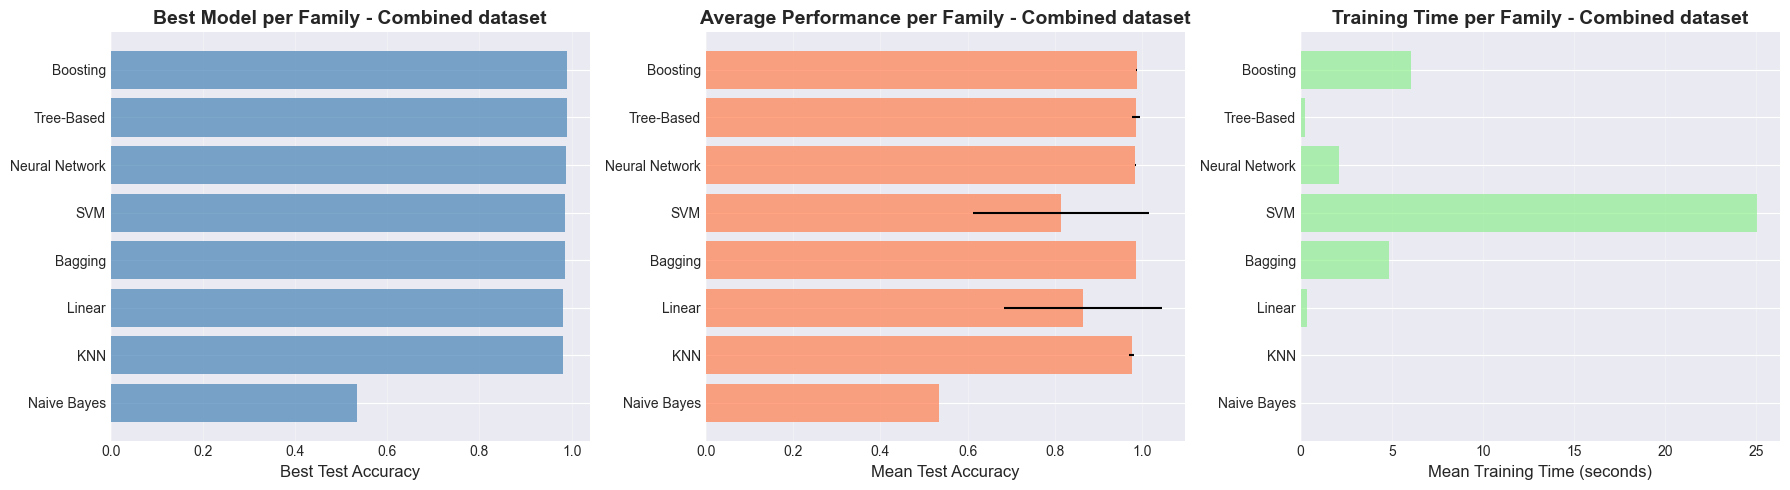

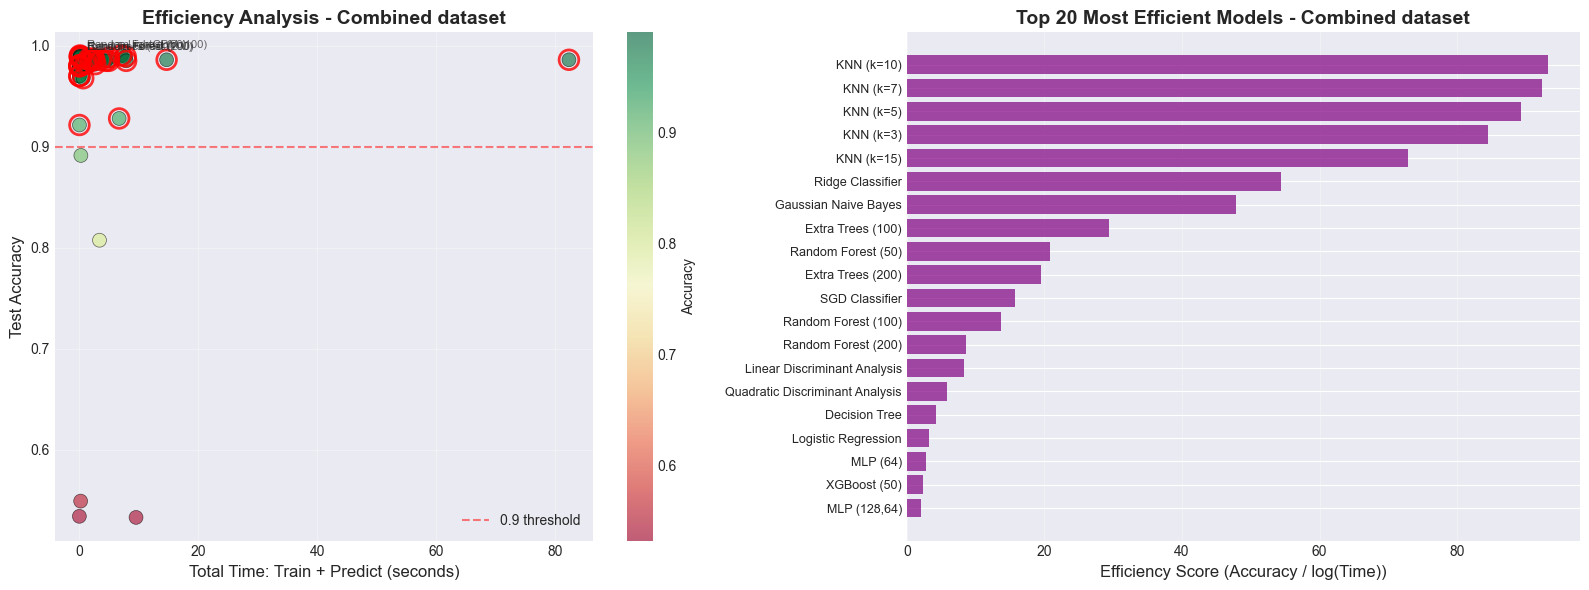


TOP 10 MOST EFFICIENT MODELS - Combined dataset

          model_name  test_accuracy  total_time  efficiency_score
          KNN (k=10)       0.969860    0.024258         93.173169
           KNN (k=7)       0.979548    0.024750         92.254178
           KNN (k=5)       0.979548    0.025597         89.238165
           KNN (k=3)       0.980624    0.027109         84.415803
          KNN (k=15)       0.969860    0.031132         72.844270
    Ridge Classifier       0.921421    0.039821         54.334038
Gaussian Naive Bayes       0.533907    0.025993         47.907948
   Extra Trees (100)       0.989236    0.080787         29.319298
  Random Forest (50)       0.990312    0.115982         20.779942
   Extra Trees (200)       0.988159    0.124142         19.443896


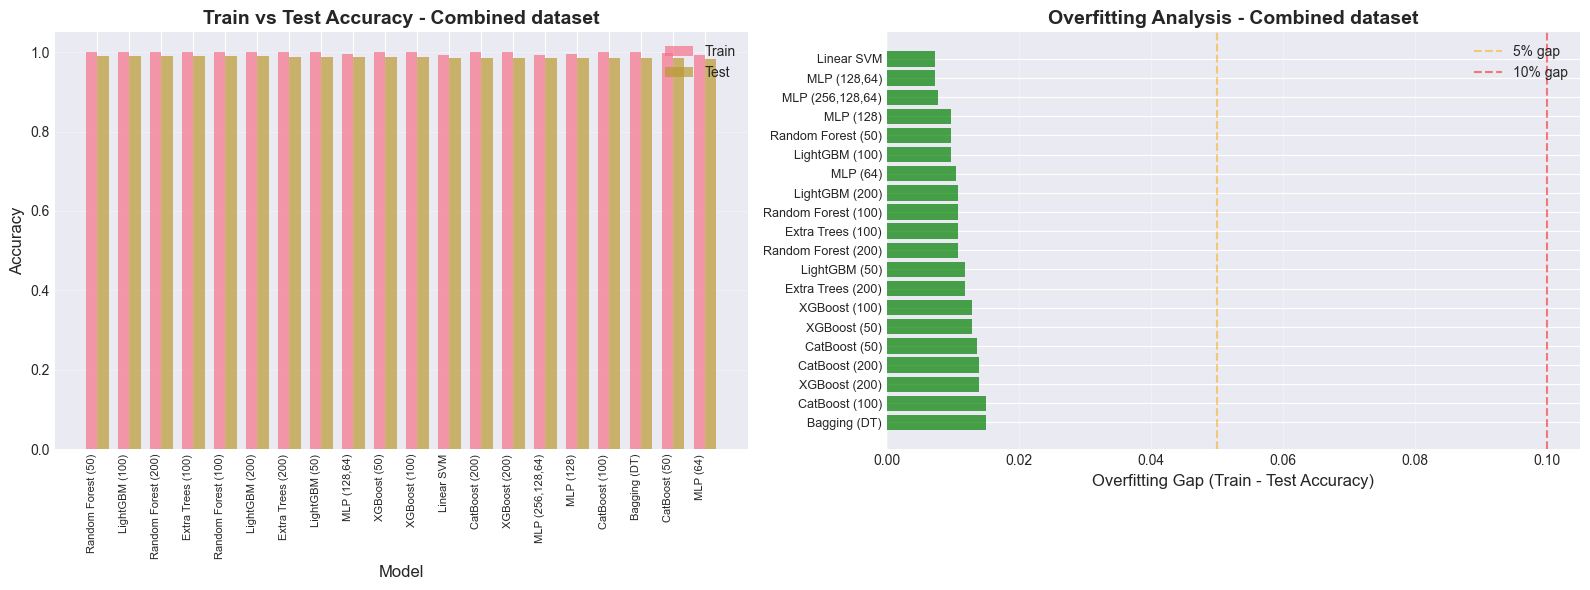


MODELS WITH LEAST OVERFITTING - Combined dataset

         model_name  train_accuracy  test_accuracy  overfit_gap
         Linear SVM        0.993267       0.986006     0.007260
       MLP (128,64)        0.994344       0.987083     0.007261
   MLP (256,128,64)        0.993806       0.986006     0.007799
          MLP (128)        0.994614       0.984930     0.009683
 Random Forest (50)        1.000000       0.990312     0.009688
     LightGBM (100)        1.000000       0.990312     0.009688
           MLP (64)        0.993267       0.982777     0.010490
     LightGBM (200)        1.000000       0.989236     0.010764
Random Forest (100)        1.000000       0.989236     0.010764
  Extra Trees (100)        1.000000       0.989236     0.010764


In [22]:
results_all = fda.run_all_models(
            plot_comparision=True,
            accuracy_threshold=0.9,
            top_n_methods=20,
            save_plot_path=None
            )

In [23]:
tuning_results = fda.model_parameter_tuning(number_of_models=1)


HYPERPARAMETER TUNING FOR TOP 1 MODELS


Tuning Random Forest (50)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
  Original Accuracy: 0.9903
  Tuned Accuracy: 0.9892
  Improvement: -0.0011
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


  Replaced NaN values with 0

SHAP FEATURE IMPORTANCE ANALYSIS

Data mode: Using SCALED data for SHAP computation, RAW data for visualization

Sampling 100 background samples from 3713 training samples...

Model: XGBClassifier
Using TreeExplainer (fast for tree-based models)...
Computing SHAP values for 929 test samples...


 98%|===================| 7295/7432 [00:23<00:00]        

SHAP computation completed in 22.87s

Multiclass problem detected: 8 classes

Using 'grid' layout for 8 classes

Generating SHAP summary plots for each class...


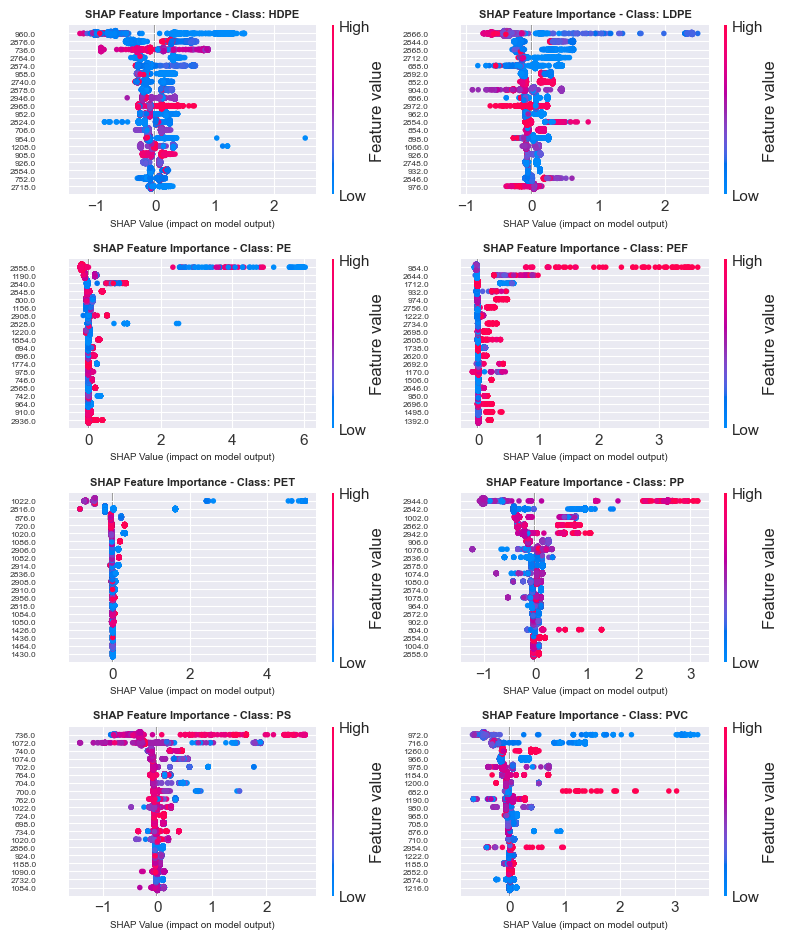


Generating SHAP bar plots (mean absolute impact)...


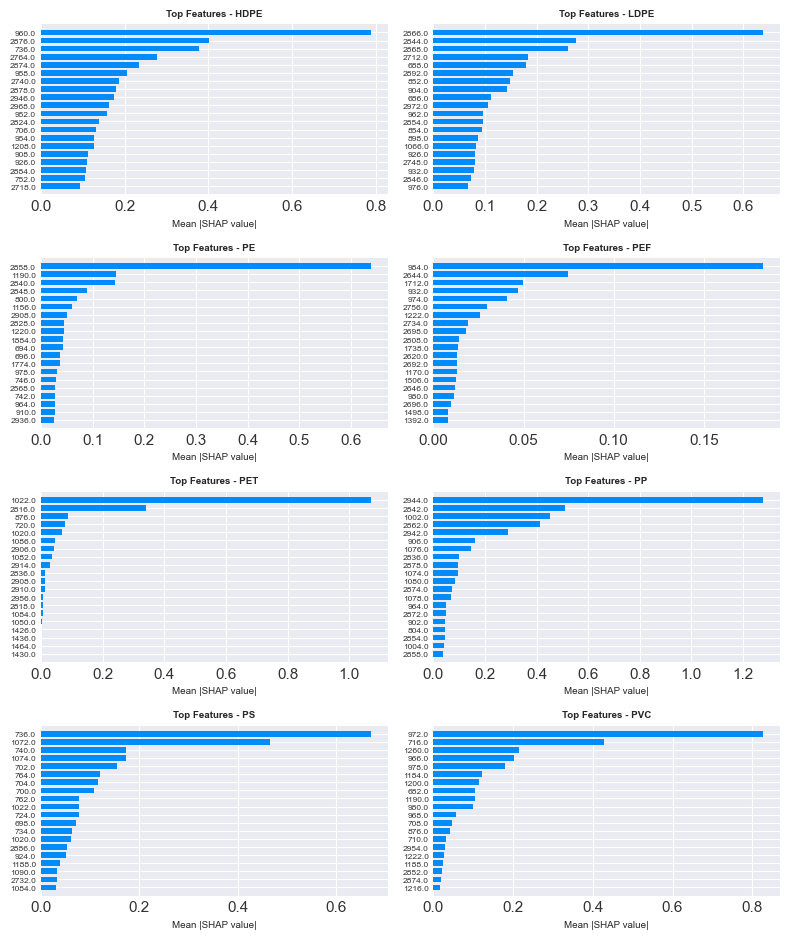


Generating combined global feature importance plot...


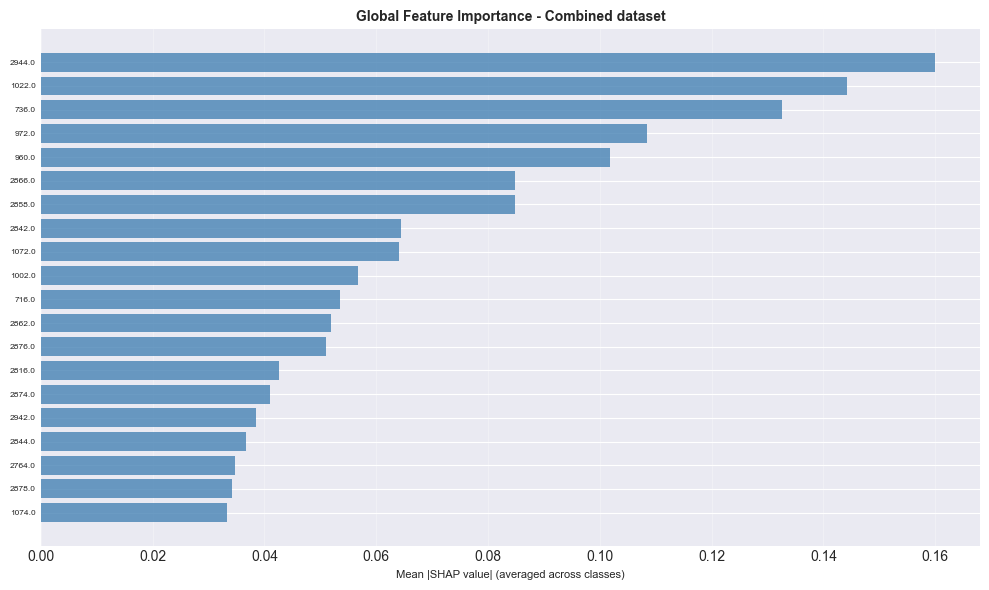


TOP 10 FEATURES PER CLASS (by mean absolute SHAP value)

HDPE:
----------------------------------------
   1.      960.0  |  Impact: 0.7879
   2.     2876.0  |  Impact: 0.4012
   3.      736.0  |  Impact: 0.3768
   4.     2764.0  |  Impact: 0.2773
   5.     2874.0  |  Impact: 0.2344
   6.      958.0  |  Impact: 0.2050
   7.     2740.0  |  Impact: 0.1868
   8.     2878.0  |  Impact: 0.1785
   9.     2946.0  |  Impact: 0.1750
  10.     2968.0  |  Impact: 0.1631

LDPE:
----------------------------------------
   1.     2866.0  |  Impact: 0.6389
   2.     2844.0  |  Impact: 0.2759
   3.     2868.0  |  Impact: 0.2602
   4.     2712.0  |  Impact: 0.1830
   5.      688.0  |  Impact: 0.1789
   6.     2892.0  |  Impact: 0.1545
   7.      852.0  |  Impact: 0.1476
   8.      904.0  |  Impact: 0.1427
   9.      686.0  |  Impact: 0.1116
  10.     2972.0  |  Impact: 0.1052

PE:
----------------------------------------
   1.     2858.0  |  Impact: 0.6389
   2.     1190.0  |  Impact: 0.1454
   3.    

In [24]:
shap_results = fda.explain_by_shap(
            model_name = 'XGBoost (100)',
            max_display = 20,
            sample_size=100,
            test_size=0.2,
            cv_folds=5,
            save_plot_path=None
    )


SHAP Decision Plot for Sample 0
True Label: HDPE


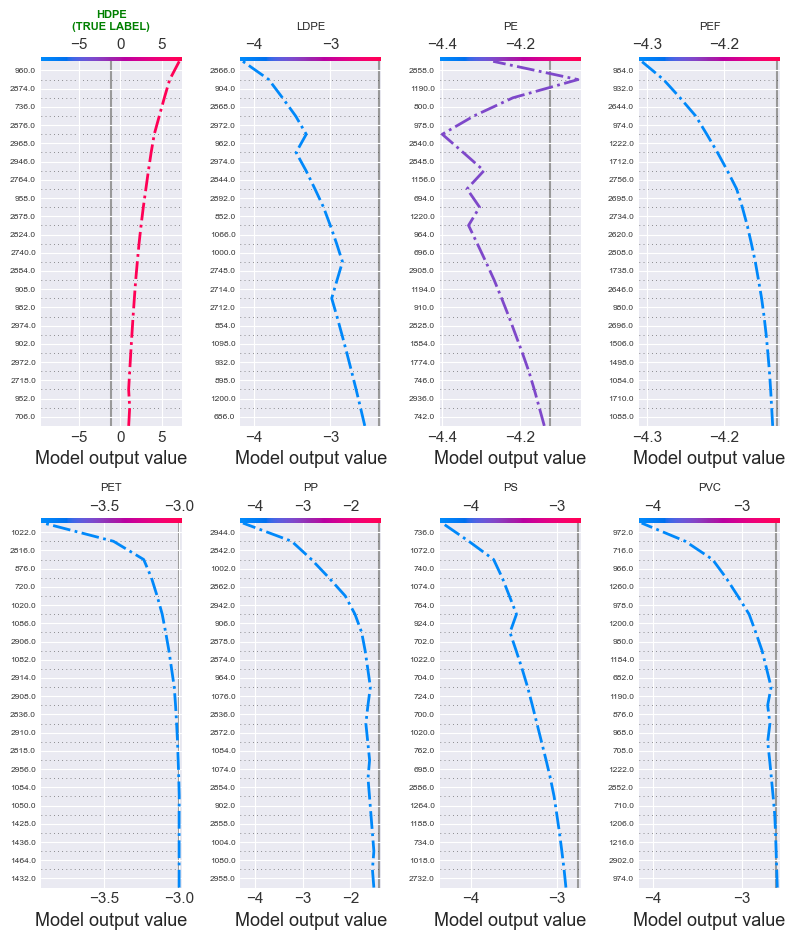

In [25]:
fda.local_shap_plot(
            sample_index=0,
            figsize=(10,8),
            save_plot_path=None
        )